# Investigating Spotify for useful insights

## <a id='toc1_'></a>[Authors](#toc0_)
* **Alireza Arbabi**
* **Hadi Babalou**
* **Ali Padyav**
* **Kasra Hajiheidari**

## <a id='toc2_'></a>[Table of Contents](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Authors](#toc1_)    
- [Table of Contents](#toc2_)    
- [Setting Up the Environment](#toc3_)    
- [Loading the Data](#toc4_)    
- [Schema of the Data](#toc5_)    
- [Preprocessing the Data](#toc6_)    
  - [Missing Values](#toc6_1_)    
  - [Duplicates](#toc6_2_)    
  - [Type Conversions](#toc6_3_)    
  - [Outliers](#toc6_4_)    
  - [Feature Engineering](#toc6_5_)    
  - [Reordering the columns](#toc6_6_)    
- [Features Correlation](#toc7_)    
- [Mutual Information](#toc8_)    
- [Features Distribution](#toc9_)    
  - [Explicit](#toc9_1_)    
  - [Danceability](#toc9_2_)    
  - [Energy](#toc9_3_)    
  - [Key](#toc9_4_)    
  - [Loudness](#toc9_5_)    
  - [Mode](#toc9_6_)    
  - [Speechiness](#toc9_7_)    
  - [Acousticness](#toc9_8_)    
  - [Instrumentalness](#toc9_9_)    
  - [Liveness](#toc9_10_)    
  - [Valence](#toc9_11_)    
  - [Tempo](#toc9_12_)    
  - [Duration](#toc9_13_)    
  - [Time Signature](#toc9_14_)    
  - [Year](#toc9_15_)    
  - [Decade](#toc9_16_)    
  - [Quarter](#toc9_17_)    
  - [Month](#toc9_18_)    
  - [Week](#toc9_19_)    
  - [Day](#toc9_20_)    
  - [Weekday](#toc9_21_)    
  - [Artist Count](#toc9_22_)    
  - [Genre Count](#toc9_23_)    
  - [Popularity](#toc9_24_)    
- [Top Records](#toc10_)    
  - [The Most Danceable Songs](#toc10_1_)    
  - [The Most Valence Songs](#toc10_2_)    
  - [The Least Valence Songs](#toc10_3_)    
  - [The Most Energetic Songs](#toc10_4_)    
  - [The Loudest Songs](#toc10_5_)    
  - [The Quietest Songs](#toc10_6_)    
  - [The Longest Songs](#toc10_7_)    
  - [The Shortest Songs](#toc10_8_)    
  - [Songs with the Highest Tempo](#toc10_9_)    
  - [Songs with the Lowest Tempo](#toc10_10_)    
  - [The Oldest Songs](#toc10_11_)    
  - [Songs with the Most Artists](#toc10_12_)    
  - [The Most Popular Songs](#toc10_13_)    
  - [Artists with the Most Songs](#toc10_14_)    
  - [Artists with the Most Albums](#toc10_15_)    
  - [Albums with the Most Songs](#toc10_16_)    
  - [Artists with the Most Explicit Songs](#toc10_17_)    
  - [Artists with the Most Danceable Songs](#toc10_18_)    
  - [Artists with the Loudest Songs](#toc10_19_)    
  - [Artists with the Most Popular Songs](#toc10_20_)    
  - [Genres with the Most Songs](#toc10_21_)    
  - [The Most Explicit Genres](#toc10_22_)    
  - [The Most Danceable Genres](#toc10_23_)    
  - [The Most Energetic Genres](#toc10_24_)    
  - [The Loudest Genres](#toc10_25_)    
  - [The Most Popular Genres](#toc10_26_)    
- [Trends Over Time](#toc11_)    
  - [Features Average Over Time](#toc11_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc3_'></a>[Setting Up the Environment](#toc0_)

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install tqdm
# !pip install scipy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif 
from scipy import stats
import tqdm

import warnings
warnings.filterwarnings("ignore")

## <a id='toc4_'></a>[Loading the Data](#toc0_)

In [3]:
DATA_PATH = 'Dataset/spotify_merged.csv'

In [4]:
data = pd.read_csv(DATA_PATH)
data.head(5)

,track_id,track_name,album_name,artists,explicit,danceability,energy,key,loudness,mode,...,time_signature,artist_ids,album_id,track_number,disc_number,duration_ms,year,release_date,popularity,track_genre
0,1BLOVHYYlH4JUHQGcpt75R,Ode To The Mets,The New Abnormal,['The Strokes'],False,0.4280,0.617,1,-5.424,0,...,4.0,['0epOFNiUfyON9EYx7Tpr6V'],2xkZV2Hl1Omi8rk2D7t5lN,9,1,351787,2020,2020-04-10,67,"['alt-rock', 'garage']"
1,2No1A7ZuMaBGxz45jmA9Gw,Glaciers,Bloom,['Lights & Motion'],False,0.0789,0.160,7,-18.144,1,...,4.0,['3ff1CmU6qfTqRAmdrq8EEG'],4N11Xw4rtuswjOeZjqKgay,4,1,176373,2018,2018-02-02,49,['ambient']
2,2v738AcSrqklWKhBpV5alf,Uber Pussy,Pink Season,['Pink Guy'],True,0.8700,0.597,7,-6.320,1,...,4.0,['3yJnBqAoRUNeDabdYoiYWD'],3l5PdpQHvUOXlq1w9PftPu,11,1,117361,2017,2017-01-04,39,['comedy']
3,2BgEsaKNfHUdlh97KmvFyo,2002,Speak Your Mind (Deluxe),['Anne-Marie'],False,0.6970,0.683,1,-2.881,0,...,4.0,['1zNqDE7qDGCsyzJwohVaoX'],7lPoGKpCGgdKFAxpudhAH5,10,1,186987,2018,2018-04-27,82,"['dance', 'house', 'pop']"
4,2cerDm5EbuTNJ68EIMtrF2,Monsters You Made (feat. Chris Martin),Twice As Tall,"['Burna Boy', 'Chris Martin']",True,0.6710,0.646,7,-7.513,0,...,4.0,"['3wcj11K77LjEY1PkEazffa', '0LQoZQIV0mIs0y0XQb...",218CJKDCszsQQj7Amk7vIu,12,1,217541,2020,2020-08-13,45,['dancehall']


## <a id='toc5_'></a>[Schema of the Data](#toc0_)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729 entries, 0 to 4728
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4729 non-null   object 
 1   track_name        4729 non-null   object 
 2   album_name        4729 non-null   object 
 3   artists           4729 non-null   object 
 4   explicit          4729 non-null   bool   
 5   danceability      4729 non-null   float64
 6   energy            4729 non-null   float64
 7   key               4729 non-null   int64  
 8   loudness          4729 non-null   float64
 9   mode              4729 non-null   int64  
 10  speechiness       4729 non-null   float64
 11  acousticness      4729 non-null   float64
 12  instrumentalness  4729 non-null   float64
 13  liveness          4729 non-null   float64
 14  valence           4729 non-null   float64
 15  tempo             4729 non-null   float64
 16  time_signature    4729 non-null   float64


The spotify dataset contains the following information about the songs:

- **track_id:** The Spotify ID for the track

- **track_name:** Name of the track
- **album_name:** The album name in which the track appears
- **artists:** The list of artists' names who performed the track.
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **artist_ids**: The list of Spotify IDs for the artists who performed the track.
- **album_id**: The Spotify ID for the album in which the track appears.
- **track_number**: The number of the track in the album.
- **disc_number**: The number of the disc in the album.
- **duration_ms**: The duration of the song in milliseconds.
- **year**: The release year of the track.
- **release_date**: The release date of the track.
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **track_genre:** The list of genres of the track.

In [6]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_number,disc_number,duration_ms,year,popularity
count,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4.729000e+03,4729.000000,4729.000000
mean,0.522059,0.656636,5.259463,-8.143404,0.648763,0.081363,0.276267,0.180123,0.214929,0.439159,122.099598,3.915416,6.019243,1.023049,2.335034e+05,2007.434130,43.383802
std,0.178606,0.258692,3.541172,4.854101,0.477407,0.088832,0.330231,0.322581,0.190918,0.255387,29.426406,0.400973,5.335393,0.160956,1.261739e+05,12.612822,20.649902
min,0.000000,0.002120,0.000000,-36.905000,0.000000,0.000000,0.000000,0.000000,0.016600,0.000000,0.000000,0.000000,1.000000,1.000000,3.230700e+04,1951.000000,0.000000
25%,0.398000,0.481000,2.000000,-10.014000,0.000000,0.034900,0.004200,0.000000,0.099000,0.229000,99.868000,4.000000,2.000000,1.000000,1.803330e+05,2001.000000,24.000000
50%,0.528000,0.707000,5.000000,-6.835000,1.000000,0.048300,0.101000,0.000308,0.133000,0.406000,120.062000,4.000000,5.000000,1.000000,2.197620e+05,2011.000000,45.000000
75%,0.652000,0.878000,8.000000,-4.846000,1.000000,0.087400,0.526000,0.153000,0.271000,0.636000,140.050000,4.000000,9.000000,1.000000,2.686130e+05,2018.000000,61.000000
max,0.980000,0.999000,11.000000,-0.072000,1.000000,0.965000,0.996000,0.993000,0.992000,0.988000,216.334000,5.000000,44.000000,4.000000,4.447520e+06,2020.000000,96.000000


## <a id='toc6_'></a>[Preprocessing the Data](#toc0_)

### <a id='toc6_1_'></a>[Missing Values](#toc0_)

In [7]:
def calculate_nulls(df):
    null_counts = df.isnull().sum()
    return null_counts

calculate_nulls(data)

track_id            0
track_name          0
album_name          0
artists             0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
artist_ids          0
album_id            0
track_number        0
disc_number         0
duration_ms         0
year                0
release_date        0
popularity          0
track_genre         0
dtype: int64

As we can see, there are no missing values in the dataset.

### <a id='toc6_2_'></a>[Duplicates](#toc0_)

In [8]:
def calculate_duplicates(df):
    duplicates = df[df.duplicated()]
    return duplicates

In [9]:
def find_duplicates_by_column(df, column_name):
    duplicates = df[df.duplicated(subset=[column_name], keep=False)]
    return duplicates

In [10]:
def filter_data_by_column_value(df, column_name, value):
    filtered_data = df[df[column_name] == value]
    return filtered_data

In [11]:
duplicates = calculate_duplicates(data)
print("Count of duplicate rows:",duplicates.shape[0])

Count of duplicate rows: 0


In [12]:
duplicate_track_ids = find_duplicates_by_column(data, 'track_id')
print("Count of duplicate rows based on track id:",duplicate_track_ids.shape[0])

Count of duplicate rows based on track id: 0


### <a id='toc6_3_'></a>[Type Conversions](#toc0_)

First of al we convert columns with `object` data type to `string`

In [13]:
def convert_object_to_string(df):
    object_columns = df.select_dtypes(include=['object']).columns
    df[object_columns] = df[object_columns].astype('string')
    return df

In [14]:
data = convert_object_to_string(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729 entries, 0 to 4728
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4729 non-null   string 
 1   track_name        4729 non-null   string 
 2   album_name        4729 non-null   string 
 3   artists           4729 non-null   string 
 4   explicit          4729 non-null   bool   
 5   danceability      4729 non-null   float64
 6   energy            4729 non-null   float64
 7   key               4729 non-null   int64  
 8   loudness          4729 non-null   float64
 9   mode              4729 non-null   int64  
 10  speechiness       4729 non-null   float64
 11  acousticness      4729 non-null   float64
 12  instrumentalness  4729 non-null   float64
 13  liveness          4729 non-null   float64
 14  valence           4729 non-null   float64
 15  tempo             4729 non-null   float64
 16  time_signature    4729 non-null   float64


We should convert `artists`, `artist_ids`, `track_genre` from `String` to `List`

In [15]:
data['artists'] = data['artists'].str.replace('[','').str.replace(']','').str.replace("'",'').str.replace('"','')
data['artists'] = data['artists'].str.split(', ')
data.head()

,track_id,track_name,album_name,artists,explicit,danceability,energy,key,loudness,mode,...,time_signature,artist_ids,album_id,track_number,disc_number,duration_ms,year,release_date,popularity,track_genre
0,1BLOVHYYlH4JUHQGcpt75R,Ode To The Mets,The New Abnormal,[The Strokes],False,0.4280,0.617,1,-5.424,0,...,4.0,['0epOFNiUfyON9EYx7Tpr6V'],2xkZV2Hl1Omi8rk2D7t5lN,9,1,351787,2020,2020-04-10,67,"['alt-rock', 'garage']"
1,2No1A7ZuMaBGxz45jmA9Gw,Glaciers,Bloom,[Lights & Motion],False,0.0789,0.160,7,-18.144,1,...,4.0,['3ff1CmU6qfTqRAmdrq8EEG'],4N11Xw4rtuswjOeZjqKgay,4,1,176373,2018,2018-02-02,49,['ambient']
2,2v738AcSrqklWKhBpV5alf,Uber Pussy,Pink Season,[Pink Guy],True,0.8700,0.597,7,-6.320,1,...,4.0,['3yJnBqAoRUNeDabdYoiYWD'],3l5PdpQHvUOXlq1w9PftPu,11,1,117361,2017,2017-01-04,39,['comedy']
3,2BgEsaKNfHUdlh97KmvFyo,2002,Speak Your Mind (Deluxe),[Anne-Marie],False,0.6970,0.683,1,-2.881,0,...,4.0,['1zNqDE7qDGCsyzJwohVaoX'],7lPoGKpCGgdKFAxpudhAH5,10,1,186987,2018,2018-04-27,82,"['dance', 'house', 'pop']"
4,2cerDm5EbuTNJ68EIMtrF2,Monsters You Made (feat. Chris Martin),Twice As Tall,"[Burna Boy, Chris Martin]",True,0.6710,0.646,7,-7.513,0,...,4.0,"['3wcj11K77LjEY1PkEazffa', '0LQoZQIV0mIs0y0XQb...",218CJKDCszsQQj7Amk7vIu,12,1,217541,2020,2020-08-13,45,['dancehall']


In [16]:
data['artist_ids'] = data['artist_ids'].str.replace('[','').str.replace(']','').str.replace("'",'').str.replace('"','')
data['artist_ids'] = data['artist_ids'].str.split(', ')
data.head()

,track_id,track_name,album_name,artists,explicit,danceability,energy,key,loudness,mode,...,time_signature,artist_ids,album_id,track_number,disc_number,duration_ms,year,release_date,popularity,track_genre
0,1BLOVHYYlH4JUHQGcpt75R,Ode To The Mets,The New Abnormal,[The Strokes],False,0.4280,0.617,1,-5.424,0,...,4.0,[0epOFNiUfyON9EYx7Tpr6V],2xkZV2Hl1Omi8rk2D7t5lN,9,1,351787,2020,2020-04-10,67,"['alt-rock', 'garage']"
1,2No1A7ZuMaBGxz45jmA9Gw,Glaciers,Bloom,[Lights & Motion],False,0.0789,0.160,7,-18.144,1,...,4.0,[3ff1CmU6qfTqRAmdrq8EEG],4N11Xw4rtuswjOeZjqKgay,4,1,176373,2018,2018-02-02,49,['ambient']
2,2v738AcSrqklWKhBpV5alf,Uber Pussy,Pink Season,[Pink Guy],True,0.8700,0.597,7,-6.320,1,...,4.0,[3yJnBqAoRUNeDabdYoiYWD],3l5PdpQHvUOXlq1w9PftPu,11,1,117361,2017,2017-01-04,39,['comedy']
3,2BgEsaKNfHUdlh97KmvFyo,2002,Speak Your Mind (Deluxe),[Anne-Marie],False,0.6970,0.683,1,-2.881,0,...,4.0,[1zNqDE7qDGCsyzJwohVaoX],7lPoGKpCGgdKFAxpudhAH5,10,1,186987,2018,2018-04-27,82,"['dance', 'house', 'pop']"
4,2cerDm5EbuTNJ68EIMtrF2,Monsters You Made (feat. Chris Martin),Twice As Tall,"[Burna Boy, Chris Martin]",True,0.6710,0.646,7,-7.513,0,...,4.0,"[3wcj11K77LjEY1PkEazffa, 0LQoZQIV0mIs0y0XQb0Sw2]",218CJKDCszsQQj7Amk7vIu,12,1,217541,2020,2020-08-13,45,['dancehall']


In [17]:
data['track_genre'] = data['track_genre'].str.replace('[','').str.replace(']','').str.replace("'",'').str.replace('"','')
data['track_genre'] = data['track_genre'].str.split(', ')
data.head()

,track_id,track_name,album_name,artists,explicit,danceability,energy,key,loudness,mode,...,time_signature,artist_ids,album_id,track_number,disc_number,duration_ms,year,release_date,popularity,track_genre
0,1BLOVHYYlH4JUHQGcpt75R,Ode To The Mets,The New Abnormal,[The Strokes],False,0.4280,0.617,1,-5.424,0,...,4.0,[0epOFNiUfyON9EYx7Tpr6V],2xkZV2Hl1Omi8rk2D7t5lN,9,1,351787,2020,2020-04-10,67,"[alt-rock, garage]"
1,2No1A7ZuMaBGxz45jmA9Gw,Glaciers,Bloom,[Lights & Motion],False,0.0789,0.160,7,-18.144,1,...,4.0,[3ff1CmU6qfTqRAmdrq8EEG],4N11Xw4rtuswjOeZjqKgay,4,1,176373,2018,2018-02-02,49,[ambient]
2,2v738AcSrqklWKhBpV5alf,Uber Pussy,Pink Season,[Pink Guy],True,0.8700,0.597,7,-6.320,1,...,4.0,[3yJnBqAoRUNeDabdYoiYWD],3l5PdpQHvUOXlq1w9PftPu,11,1,117361,2017,2017-01-04,39,[comedy]
3,2BgEsaKNfHUdlh97KmvFyo,2002,Speak Your Mind (Deluxe),[Anne-Marie],False,0.6970,0.683,1,-2.881,0,...,4.0,[1zNqDE7qDGCsyzJwohVaoX],7lPoGKpCGgdKFAxpudhAH5,10,1,186987,2018,2018-04-27,82,"[dance, house, pop]"
4,2cerDm5EbuTNJ68EIMtrF2,Monsters You Made (feat. Chris Martin),Twice As Tall,"[Burna Boy, Chris Martin]",True,0.6710,0.646,7,-7.513,0,...,4.0,"[3wcj11K77LjEY1PkEazffa, 0LQoZQIV0mIs0y0XQb0Sw2]",218CJKDCszsQQj7Amk7vIu,12,1,217541,2020,2020-08-13,45,[dancehall]


Next, we need to convert `release_date` to `datetime`

In [18]:
data['release_date'] = pd.to_datetime(data['release_date'])
data.head()

,track_id,track_name,album_name,artists,explicit,danceability,energy,key,loudness,mode,...,time_signature,artist_ids,album_id,track_number,disc_number,duration_ms,year,release_date,popularity,track_genre
0,1BLOVHYYlH4JUHQGcpt75R,Ode To The Mets,The New Abnormal,[The Strokes],False,0.4280,0.617,1,-5.424,0,...,4.0,[0epOFNiUfyON9EYx7Tpr6V],2xkZV2Hl1Omi8rk2D7t5lN,9,1,351787,2020,2020-04-10,67,"[alt-rock, garage]"
1,2No1A7ZuMaBGxz45jmA9Gw,Glaciers,Bloom,[Lights & Motion],False,0.0789,0.160,7,-18.144,1,...,4.0,[3ff1CmU6qfTqRAmdrq8EEG],4N11Xw4rtuswjOeZjqKgay,4,1,176373,2018,2018-02-02,49,[ambient]
2,2v738AcSrqklWKhBpV5alf,Uber Pussy,Pink Season,[Pink Guy],True,0.8700,0.597,7,-6.320,1,...,4.0,[3yJnBqAoRUNeDabdYoiYWD],3l5PdpQHvUOXlq1w9PftPu,11,1,117361,2017,2017-01-04,39,[comedy]
3,2BgEsaKNfHUdlh97KmvFyo,2002,Speak Your Mind (Deluxe),[Anne-Marie],False,0.6970,0.683,1,-2.881,0,...,4.0,[1zNqDE7qDGCsyzJwohVaoX],7lPoGKpCGgdKFAxpudhAH5,10,1,186987,2018,2018-04-27,82,"[dance, house, pop]"
4,2cerDm5EbuTNJ68EIMtrF2,Monsters You Made (feat. Chris Martin),Twice As Tall,"[Burna Boy, Chris Martin]",True,0.6710,0.646,7,-7.513,0,...,4.0,"[3wcj11K77LjEY1PkEazffa, 0LQoZQIV0mIs0y0XQb0Sw2]",218CJKDCszsQQj7Amk7vIu,12,1,217541,2020,2020-08-13,45,[dancehall]


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729 entries, 0 to 4728
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_id          4729 non-null   string        
 1   track_name        4729 non-null   string        
 2   album_name        4729 non-null   string        
 3   artists           4729 non-null   object        
 4   explicit          4729 non-null   bool          
 5   danceability      4729 non-null   float64       
 6   energy            4729 non-null   float64       
 7   key               4729 non-null   int64         
 8   loudness          4729 non-null   float64       
 9   mode              4729 non-null   int64         
 10  speechiness       4729 non-null   float64       
 11  acousticness      4729 non-null   float64       
 12  instrumentalness  4729 non-null   float64       
 13  liveness          4729 non-null   float64       
 14  valence           4729 n

### <a id='toc6_4_'></a>[Outliers](#toc0_)

Identifying and handling outliers is an important step in the data preprocessing phase. Outliers can have a significant impact on the results of the analysis and can lead to incorrect conclusions. In this section, we will identify and handle outliers in the dataset.
One of potential outliers are extremely short or long tracks.

In [20]:
MINS_TO_MS = 60 * 1000
MIN_DURATION_TO_KEEP = 0.5
MAX_DURATION_TO_KEEP = 15

The songs shorther than `MIN_DURATION_TO_KEEP` are typically not songs and are likely to be skits, ads, or other non-musical content. We will remove these songs from the dataset.

In [21]:
outliers_data = data[data['duration_ms'] < MIN_DURATION_TO_KEEP * MINS_TO_MS]
sorted_df = outliers_data.sort_values(by='duration_ms', ascending=True)
print("Count of the songs shorther than 30 seconds:",sorted_df.shape[0])

Count of the songs shorther than 30 seconds: 0


In [22]:
data = data[data['duration_ms'] >= MIN_DURATION_TO_KEEP * MINS_TO_MS]

The songs longer than `MAX_DURATION_TO_KEEP` are typically not songs and are likely to be audiobooks, podcasts, or other long-form content. We will remove these songs from the dataset.

In [23]:
outliers_data = data[data['duration_ms'] > MAX_DURATION_TO_KEEP * MINS_TO_MS]
sorted_df = outliers_data.sort_values(by='duration_ms', ascending=False)
print("Count of the songs longer than 15 minutes:",sorted_df.shape[0])

Count of the songs longer than 15 minutes: 5


In [24]:
data = data[data['duration_ms'] <= MAX_DURATION_TO_KEEP * MINS_TO_MS]

Anther potential problem could be the release date of the songs.

In [25]:
print(f'Min Year: {data["release_date"].dt.year.min()}')
print(f'Max Year: {data["release_date"].dt.year.max()}')

Min Year: 1951
Max Year: 2020


### <a id='toc6_5_'></a>[Feature Engineering](#toc0_)

We extract `duration_mins` from `duration_ms` column.

In [26]:
data['duration_mins'] = data['duration_ms'] / MINS_TO_MS
data.head(5)

,track_id,track_name,album_name,artists,explicit,danceability,energy,key,loudness,mode,...,artist_ids,album_id,track_number,disc_number,duration_ms,year,release_date,popularity,track_genre,duration_mins
0,1BLOVHYYlH4JUHQGcpt75R,Ode To The Mets,The New Abnormal,[The Strokes],False,0.4280,0.617,1,-5.424,0,...,[0epOFNiUfyON9EYx7Tpr6V],2xkZV2Hl1Omi8rk2D7t5lN,9,1,351787,2020,2020-04-10,67,"[alt-rock, garage]",5.863117
1,2No1A7ZuMaBGxz45jmA9Gw,Glaciers,Bloom,[Lights & Motion],False,0.0789,0.160,7,-18.144,1,...,[3ff1CmU6qfTqRAmdrq8EEG],4N11Xw4rtuswjOeZjqKgay,4,1,176373,2018,2018-02-02,49,[ambient],2.939550
2,2v738AcSrqklWKhBpV5alf,Uber Pussy,Pink Season,[Pink Guy],True,0.8700,0.597,7,-6.320,1,...,[3yJnBqAoRUNeDabdYoiYWD],3l5PdpQHvUOXlq1w9PftPu,11,1,117361,2017,2017-01-04,39,[comedy],1.956017
3,2BgEsaKNfHUdlh97KmvFyo,2002,Speak Your Mind (Deluxe),[Anne-Marie],False,0.6970,0.683,1,-2.881,0,...,[1zNqDE7qDGCsyzJwohVaoX],7lPoGKpCGgdKFAxpudhAH5,10,1,186987,2018,2018-04-27,82,"[dance, house, pop]",3.116450
4,2cerDm5EbuTNJ68EIMtrF2,Monsters You Made (feat. Chris Martin),Twice As Tall,"[Burna Boy, Chris Martin]",True,0.6710,0.646,7,-7.513,0,...,"[3wcj11K77LjEY1PkEazffa, 0LQoZQIV0mIs0y0XQb0Sw2]",218CJKDCszsQQj7Amk7vIu,12,1,217541,2020,2020-08-13,45,[dancehall],3.625683


Also we can extract other useful features from the `release_date` column.

In [27]:
data['year'] = data['release_date'].dt.year
data['month'] = data['release_date'].dt.month
data['day'] = data['release_date'].dt.day
data['day_of_week'] = data['release_date'].dt.day_name()
data['week_of_year'] = data['release_date'].dt.weekofyear
data['quarter'] = data['release_date'].dt.quarter
data['day_of_year'] = data['release_date'].dt.dayofyear
data['decade'] = data['year'] // 10 * 10
data.head()

,track_id,track_name,album_name,artists,explicit,danceability,energy,key,loudness,mode,...,popularity,track_genre,duration_mins,month,day,day_of_week,week_of_year,quarter,day_of_year,decade
0,1BLOVHYYlH4JUHQGcpt75R,Ode To The Mets,The New Abnormal,[The Strokes],False,0.4280,0.617,1,-5.424,0,...,67,"[alt-rock, garage]",5.863117,4,10,Friday,15,2,101,2020
1,2No1A7ZuMaBGxz45jmA9Gw,Glaciers,Bloom,[Lights & Motion],False,0.0789,0.160,7,-18.144,1,...,49,[ambient],2.939550,2,2,Friday,5,1,33,2010
2,2v738AcSrqklWKhBpV5alf,Uber Pussy,Pink Season,[Pink Guy],True,0.8700,0.597,7,-6.320,1,...,39,[comedy],1.956017,1,4,Wednesday,1,1,4,2010
3,2BgEsaKNfHUdlh97KmvFyo,2002,Speak Your Mind (Deluxe),[Anne-Marie],False,0.6970,0.683,1,-2.881,0,...,82,"[dance, house, pop]",3.116450,4,27,Friday,17,2,117,2010
4,2cerDm5EbuTNJ68EIMtrF2,Monsters You Made (feat. Chris Martin),Twice As Tall,"[Burna Boy, Chris Martin]",True,0.6710,0.646,7,-7.513,0,...,45,[dancehall],3.625683,8,13,Thursday,33,3,226,2020


We can derive the `artist_count` from the `artists` column and `genre_count` from the `track_genre` column.

In [28]:
data['artist_count'] = data['artists'].apply(lambda x: len(x))
data['genre_count'] = data['track_genre'].apply(lambda x: len(x))
data.head()

,track_id,track_name,album_name,artists,explicit,danceability,energy,key,loudness,mode,...,duration_mins,month,day,day_of_week,week_of_year,quarter,day_of_year,decade,artist_count,genre_count
0,1BLOVHYYlH4JUHQGcpt75R,Ode To The Mets,The New Abnormal,[The Strokes],False,0.4280,0.617,1,-5.424,0,...,5.863117,4,10,Friday,15,2,101,2020,1,2
1,2No1A7ZuMaBGxz45jmA9Gw,Glaciers,Bloom,[Lights & Motion],False,0.0789,0.160,7,-18.144,1,...,2.939550,2,2,Friday,5,1,33,2010,1,1
2,2v738AcSrqklWKhBpV5alf,Uber Pussy,Pink Season,[Pink Guy],True,0.8700,0.597,7,-6.320,1,...,1.956017,1,4,Wednesday,1,1,4,2010,1,1
3,2BgEsaKNfHUdlh97KmvFyo,2002,Speak Your Mind (Deluxe),[Anne-Marie],False,0.6970,0.683,1,-2.881,0,...,3.116450,4,27,Friday,17,2,117,2010,1,3
4,2cerDm5EbuTNJ68EIMtrF2,Monsters You Made (feat. Chris Martin),Twice As Tall,"[Burna Boy, Chris Martin]",True,0.6710,0.646,7,-7.513,0,...,3.625683,8,13,Thursday,33,3,226,2020,2,1


### <a id='toc6_6_'></a>[Reordering the columns](#toc0_)

In [29]:
data = data[['track_name', 'album_name', 'artists', 
             'explicit', 'key', 'mode', 'time_signature', 
             'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
             'track_id', 'album_id', 'artist_ids', 'track_number', 'disc_number', 
             'release_date', 'decade', 'year', 'quarter', 'month', 'week_of_year', 'day', 'day_of_week', 'day_of_year', 
			 'duration_mins', 'duration_ms', 
             'artist_count', 'genre_count', 
             'track_genre', 'popularity']]

## <a id='toc7_'></a>[Features Correlation](#toc0_)

In [30]:
def plot_correlation_matrix(df, columns, figsize=(16, 12)):
    corr_df = df[columns].corr()
    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(corr_df, dtype=bool)) 
    sns.heatmap(corr_df, annot=True, cmap='PRGn', fmt=".2f", mask=mask)
    plt.show()
    return corr_df

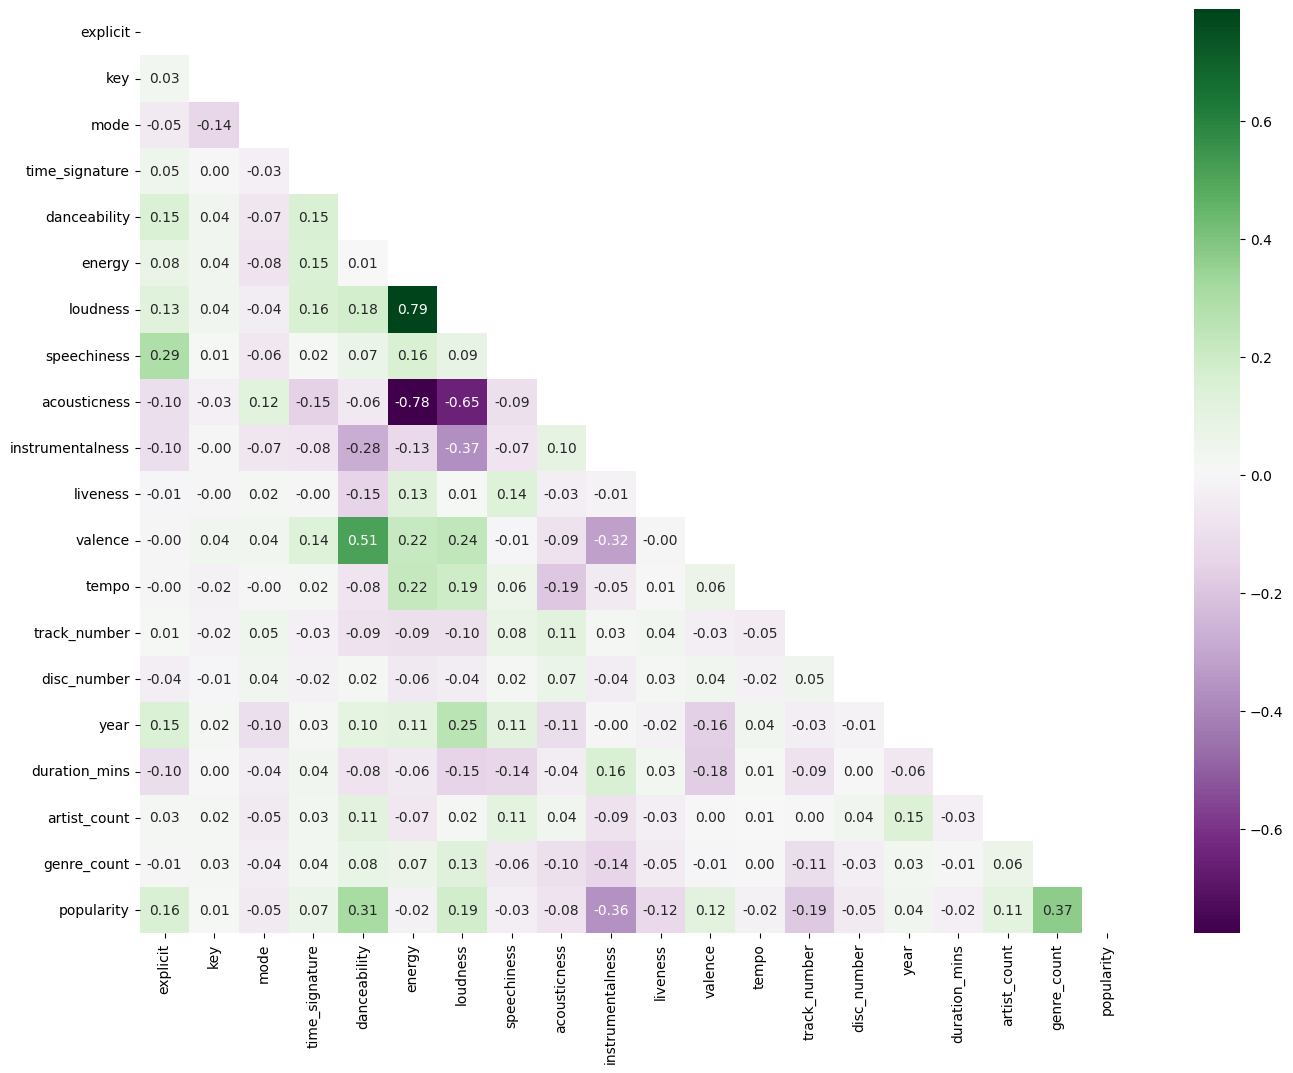

In [31]:
numeric_columns = data.select_dtypes(include=[np.number, 'bool']).columns
numeric_columns = numeric_columns.drop(['decade', 'quarter', 'month', 'week_of_year', 'day', 'day_of_year', 'duration_ms'])
corr_df = plot_correlation_matrix(data, columns=numeric_columns)


As we can see, `genre_count`, `instrumentalness`, `danceability`, and `loudness` have the highest correlation with `popularity`.

In [32]:
def plot_filtered_correlation_matrix(corr_df, threshold=0.5, figsize=(20, 10)):
    filtered_corr_df = corr_df[(corr_df.abs() > threshold) & (corr_df != 1.0)].copy()
    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(filtered_corr_df, dtype=bool))
    sns.heatmap(filtered_corr_df, annot=True, cmap='PRGn', fmt=".2f", vmin=-1, vmax=1, center=0, mask=mask)
    plt.show()

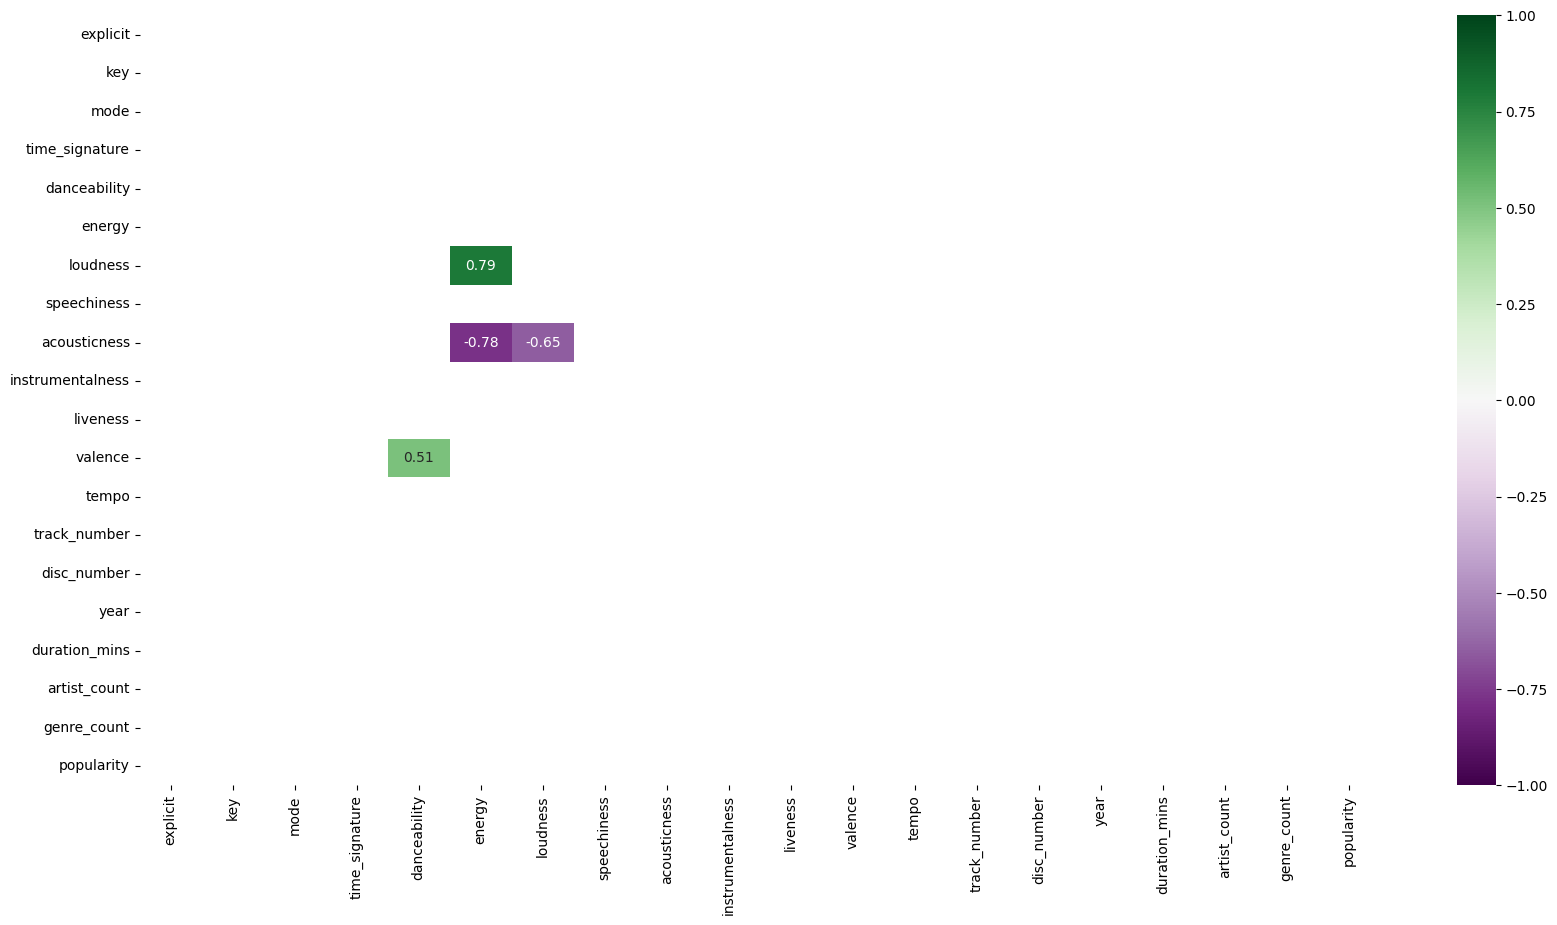

In [33]:
plot_filtered_correlation_matrix(corr_df, threshold=0.5)

As we can see, the `energy` and `loudness` columns have a high positive correlation of `0.79`. This is expected because songs with higher energy levels tend to be louder. 

The `energy` and `acousticness` columns have a high negative correlation of `-0.78`. This is also expected because songs with higher energy levels tend to have lower acousticness levels. 

The `loudness` and `acousticness` columns have a high negative correlation of `-0.65`. This is also expected because songs with higher loudness levels tend to have lower acousticness levels.

The `valence` and `danceability` columns have a high positive correlation of `0.51`. This is expected because songs with higher valence levels tend to be more danceable.

## <a id='toc8_'></a>[Mutual Information](#toc0_)

In [34]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()
df_encoded = data.copy()
df_encoded = df_encoded.drop(columns=['track_name', 'album_name', 'release_date', 'track_id', 'album_id', 'artist_ids'])

df_encoded = df_encoded.explode('track_genre')
df_encoded['track_genre'] = label_encoder.fit_transform(df_encoded['track_genre'])

df_encoded = df_encoded.explode('artists')
df_encoded['artists'] = label_encoder.fit_transform(df_encoded['artists'])

df_encoded['day_of_week'] = ordinal_encoder.fit_transform(df_encoded['day_of_week'].values.reshape(-1, 1))

In [35]:
def calculate_mutual_info(df, target_column, columns=[]):
	if len(columns) == 0:
		columns = df.columns

	mutual_info = {}
	for column in columns:
		if column == target_column:
			continue
		mutual_info[column] = mutual_info_classif(df[[column]], df[target_column])[0]
	return mutual_info

In [36]:
mutual_info = calculate_mutual_info(df_encoded, 'popularity')
mutual_info_df = pd.DataFrame(list(mutual_info.items()), columns=['Feature', 'Mutual Info'])
mutual_info_df = mutual_info_df.sort_values(by='Mutual Info', ascending=False)
mutual_info_df

,Feature,Mutual Info
13,tempo,1.334826
24,duration_mins,1.321445
7,loudness,1.317367
9,acousticness,1.294298
6,energy,1.091974
12,valence,1.077996
5,danceability,1.066396
8,speechiness,1.056502
11,liveness,0.980556
10,instrumentalness,0.847728


This information suggests that `tempo`, `loudness`, `duration_mins`, and `acousticness` are the most important features for predicting `popularity`.

## <a id='toc9_'></a>[Features Distribution](#toc0_)

In [37]:
def count_plot(df, col_name, figsize=(12, 6), sorted=True, step=None):
    plt.figure(figsize=figsize)
    if sorted:
        value_counts = df[col_name].value_counts().sort_values(ascending=False)
        sns.countplot(data=df, x=col_name, order=value_counts.index, color='deepskyblue', alpha=0.5)
    else:
        sns.countplot(data=df, x=col_name, color='deepskyblue', alpha=0.5)
    
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.title(f'{col_name} Count Plot')
    
    if step is not None:
        plt.xticks(ticks=plt.xticks()[0][::step], rotation=90)
    
    plt.show()

In [38]:
def box_plot(df, x, figsize=(6, 8)):
    plt.figure(figsize=figsize)
    sns.boxplot(data=df, y=x, color='deepskyblue', showmeans=True, meanline=True,
                meanprops={'linestyle': '--', 'color': 'red'})
    
    plt.title(f'{x} Box Plot')
    plt.show()

In [39]:
def violin_plot(df, x, figsize=(6, 8)):
    plt.figure(figsize=figsize)
    sns.violinplot(data=df, y=x, color='deepskyblue', inner='quartile', alpha=0.5)
    plt.title(f'{x} Violin Plot')
    plt.show()

In [40]:
def hist_plot(df, col_name, bins=None, figsize=(12, 6), kde=True, normal_estimation=True, rule='sturges', stat='count'):
    target_column = df[col_name]
    
    if bins is None:
        count = target_column.count()
        if rule == 'sturges':
            bins = int(1 + 3.322 * np.log10(count))
        elif rule == 'rice':
            bins = int(2 * count ** (1/3))
        elif rule == 'doane':
            skewness = stats.skew(target_column.dropna())
            bins = int(1 + np.log2(count) + np.log2(1 + abs(skewness)))
        elif rule == 'scott':
            bins = int(3.5 * np.std(target_column.dropna()) / (count ** (1/3)))
        elif rule == 'sqrt':
            bins = int(np.sqrt(count))
        else:
            bins = 10
    plt.figure(figsize=figsize)
    hist_plot = sns.histplot(data=df, x=col_name, bins=bins, color='deepskyblue', kde=kde, alpha=0.5, stat=stat)
    
    if normal_estimation:
        mu, sigma = target_column.mean(), target_column.std()
        x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
        y = stats.norm.pdf(x, mu, sigma)
        scale_factor = hist_plot.get_yticks().max() / y.max()
        y = y * scale_factor
        plt.plot(x, y, color='deeppink', linewidth=2, alpha=0.5)
    
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.title(f'{col_name} Histogram Plot')
    
    if normal_estimation:
        plt.legend(['Normal Distribution', 'Kernel Density Estimation'])

    plt.show()

In [41]:
df = data.copy()

### <a id='toc9_1_'></a>[Explicit](#toc0_)

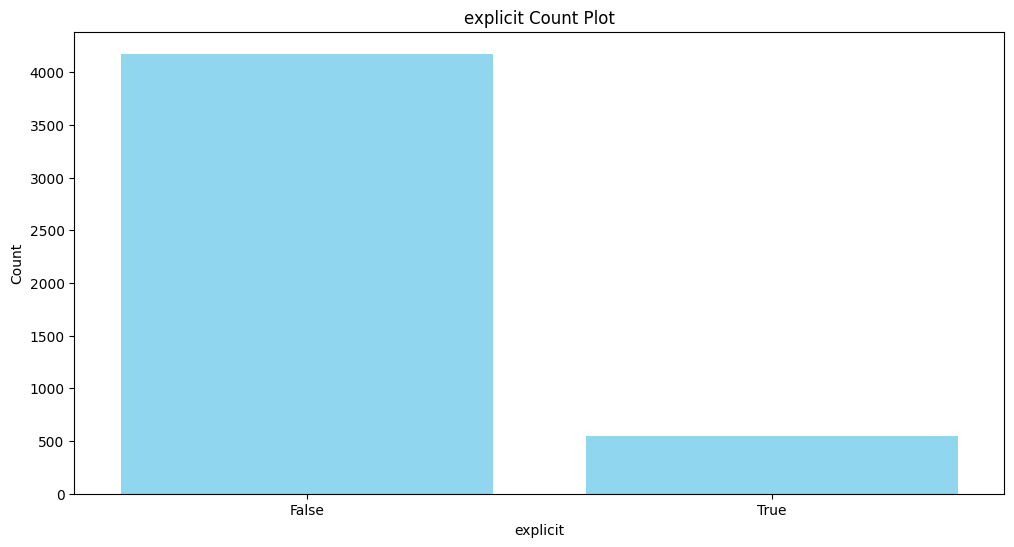

In [42]:
count_plot(df, 'explicit')

### <a id='toc9_2_'></a>[Danceability](#toc0_)

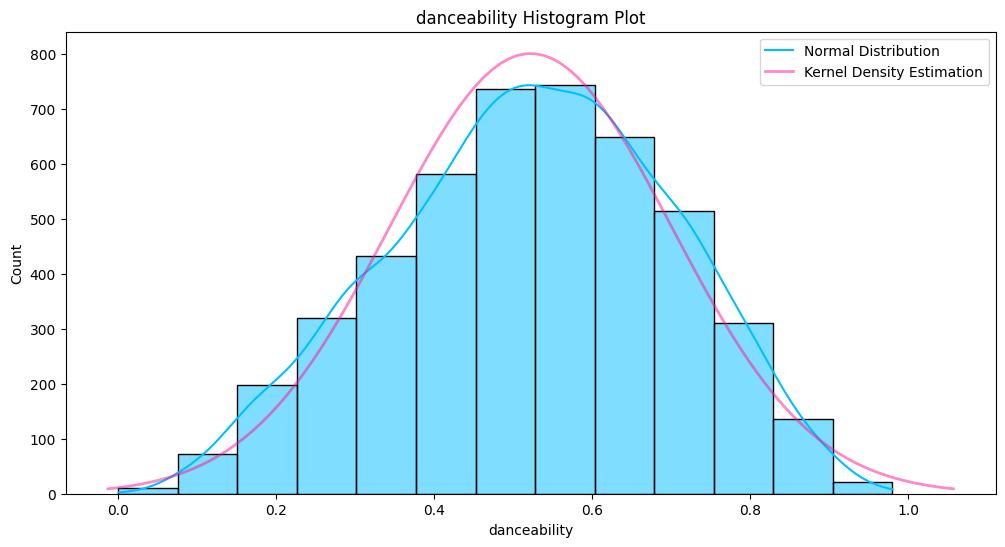

In [43]:
hist_plot(df, 'danceability')

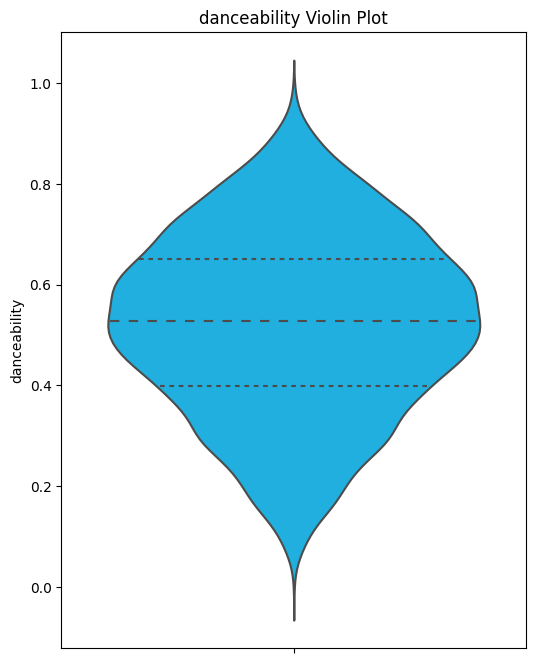

In [44]:
violin_plot(df, 'danceability')

### <a id='toc9_3_'></a>[Energy](#toc0_)

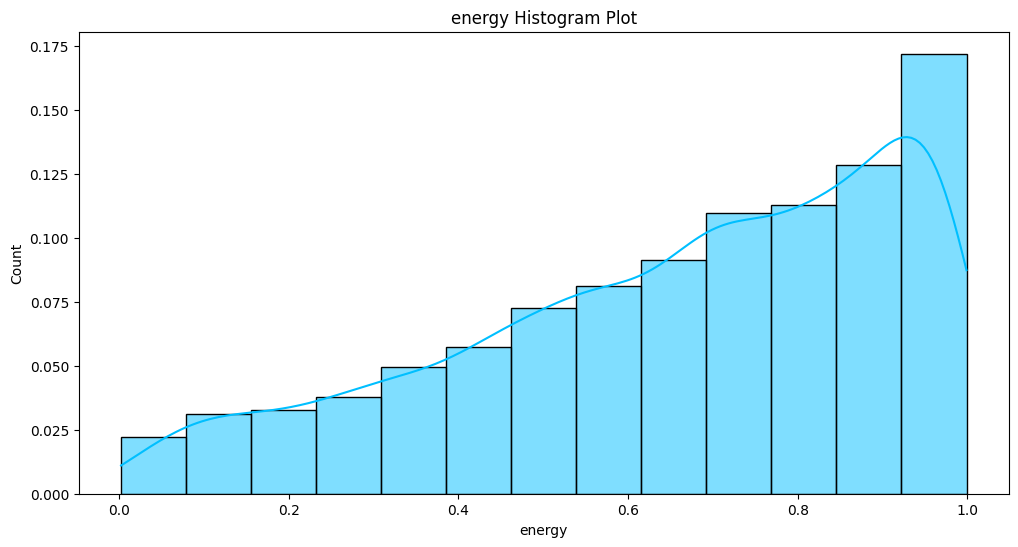

In [45]:
hist_plot(df, 'energy', normal_estimation=False, stat='proportion')

As we can see, this energy distribution is left-skewed, which means that most songs have high energy levels.

### <a id='toc9_4_'></a>[Key](#toc0_)

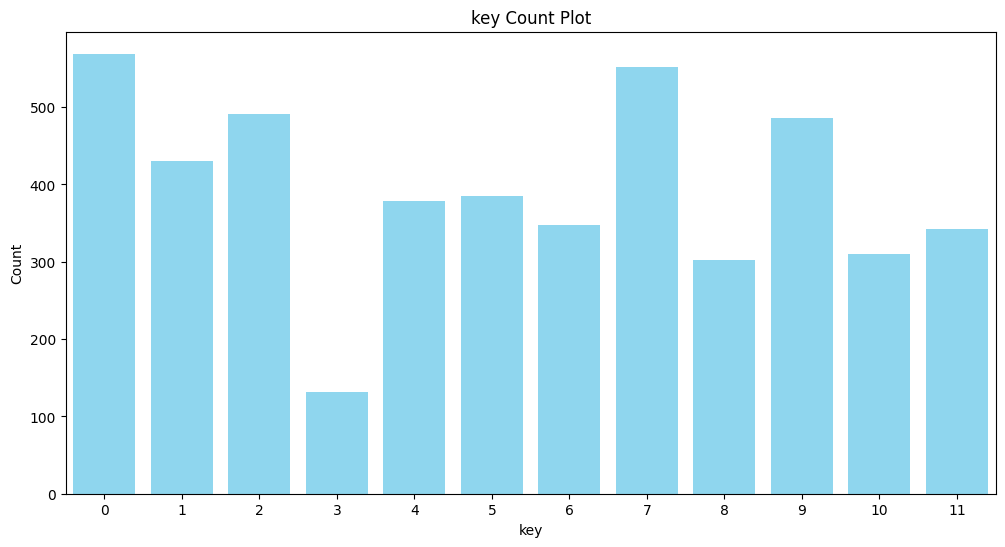

In [46]:
count_plot(df, 'key', sorted=False)

### <a id='toc9_5_'></a>[Loudness](#toc0_)

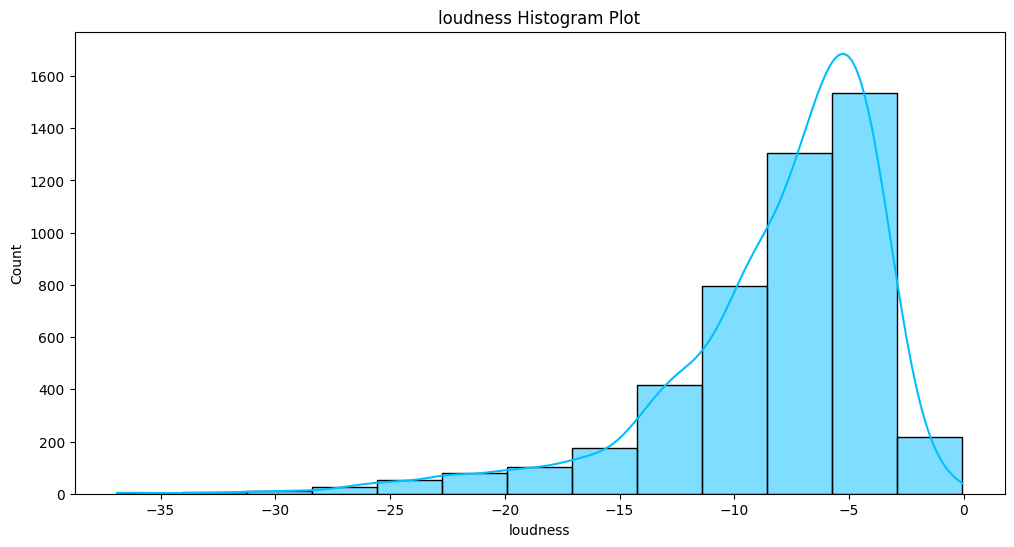

In [47]:
hist_plot(df, 'loudness', normal_estimation=False)

### <a id='toc9_6_'></a>[Mode](#toc0_)

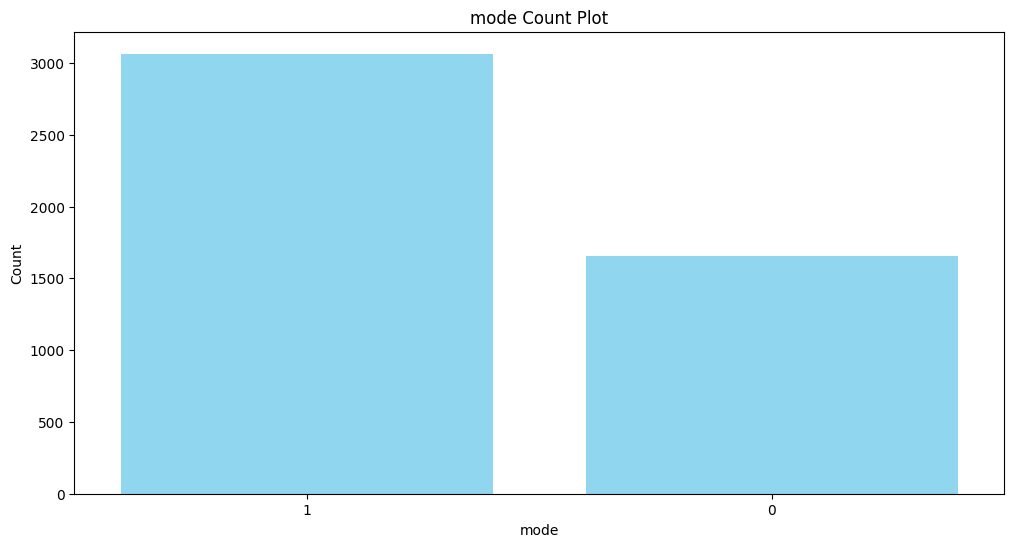

In [48]:
count_plot(df, 'mode')

### <a id='toc9_7_'></a>[Speechiness](#toc0_)

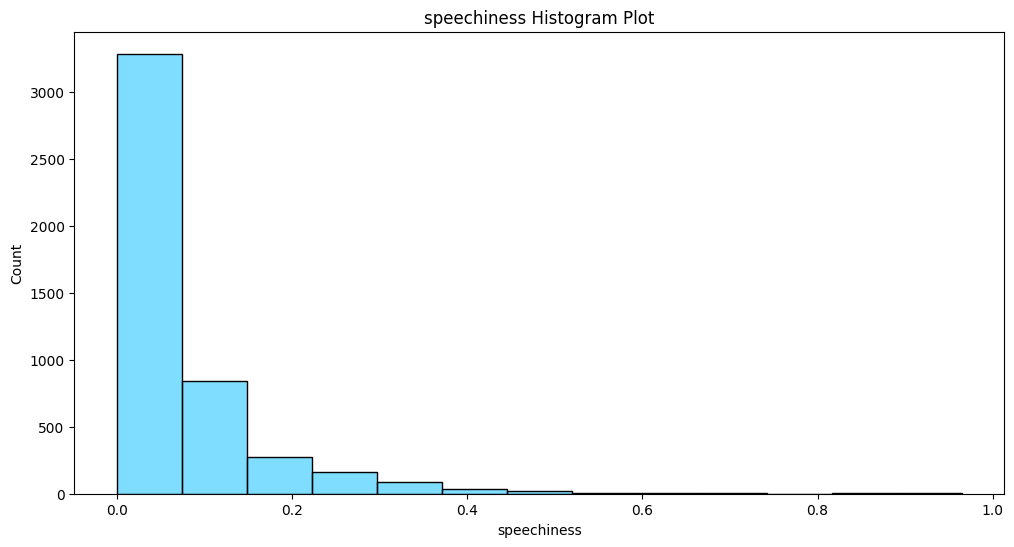

In [49]:
hist_plot(df, 'speechiness', kde=False, normal_estimation=False)

The distribution of speechiness seems to be skewed toward lower values. This is expected because most songs are primarily instrumental and contain little to no spoken words.

### <a id='toc9_8_'></a>[Acousticness](#toc0_)

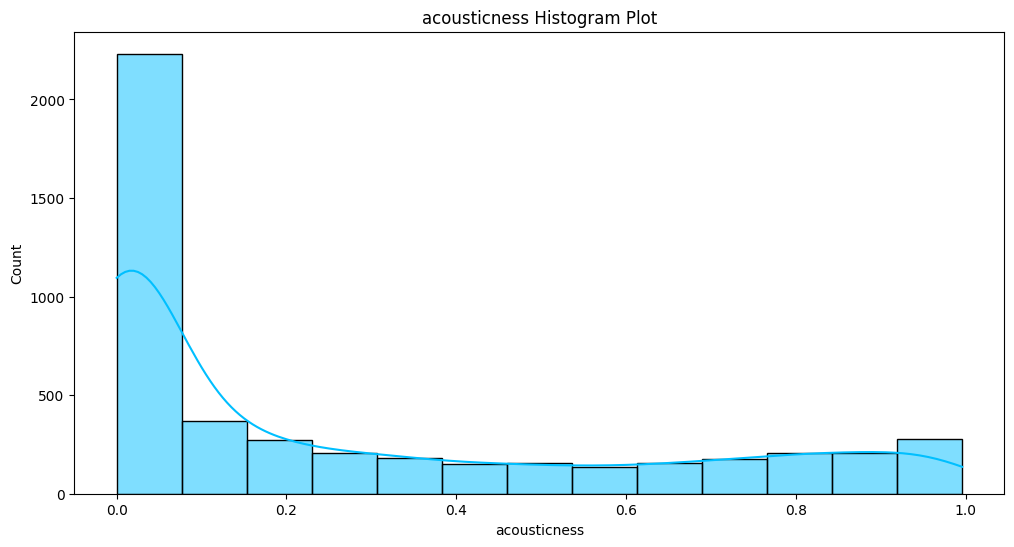

In [50]:
hist_plot(df, 'acousticness', normal_estimation=False)

### <a id='toc9_9_'></a>[Instrumentalness](#toc0_)

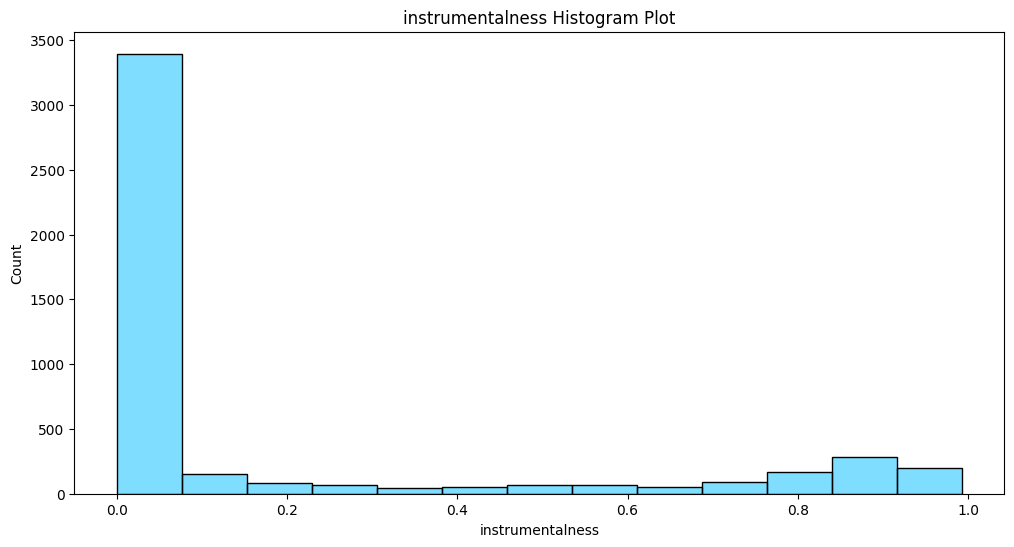

In [51]:
hist_plot(df, 'instrumentalness', kde=False, normal_estimation=False)

### <a id='toc9_10_'></a>[Liveness](#toc0_)

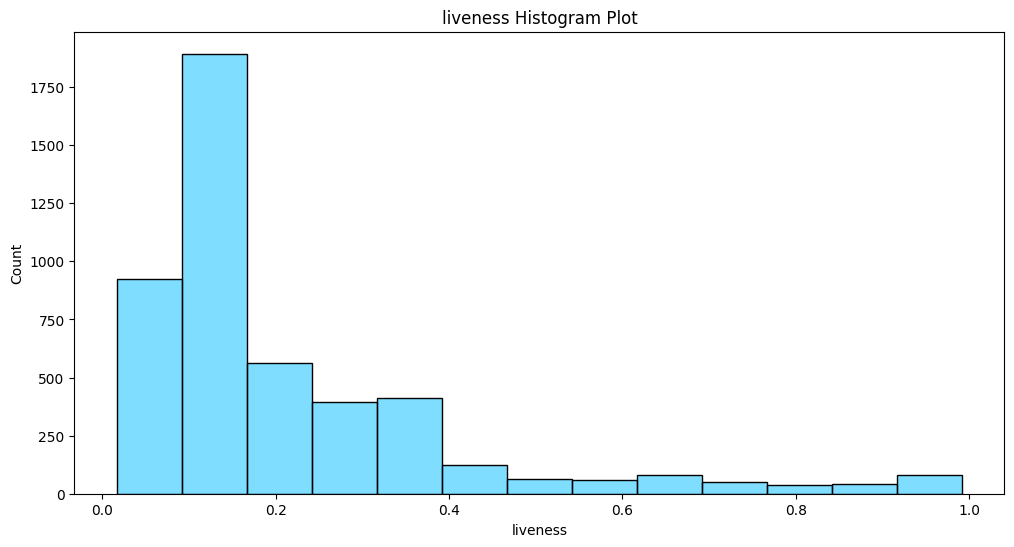

In [52]:
hist_plot(df, 'liveness', kde=False, normal_estimation=False)

### <a id='toc9_11_'></a>[Valence](#toc0_)

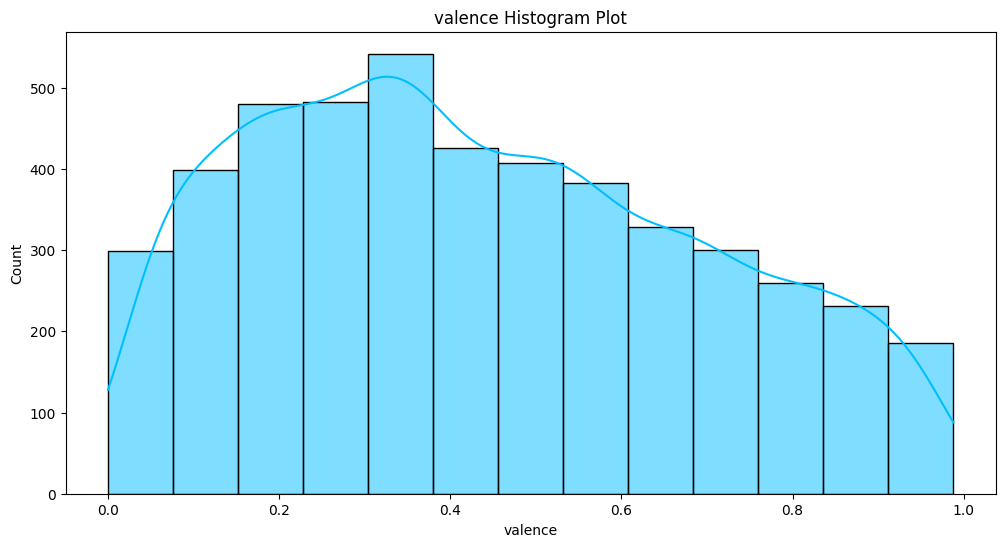

In [53]:
hist_plot(df, 'valence', normal_estimation=False)

### <a id='toc9_12_'></a>[Tempo](#toc0_)

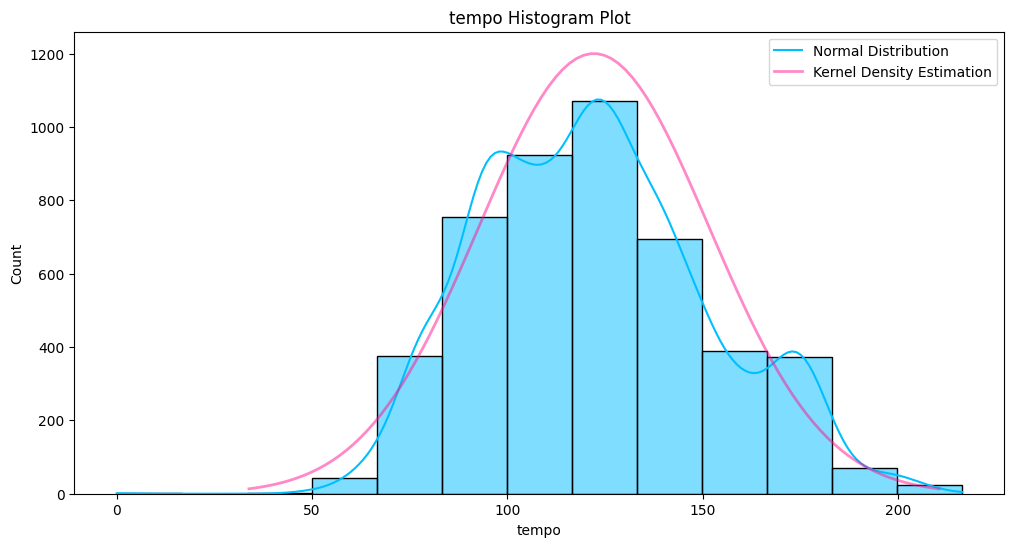

In [54]:
hist_plot(df, 'tempo')

### <a id='toc9_13_'></a>[Duration](#toc0_)

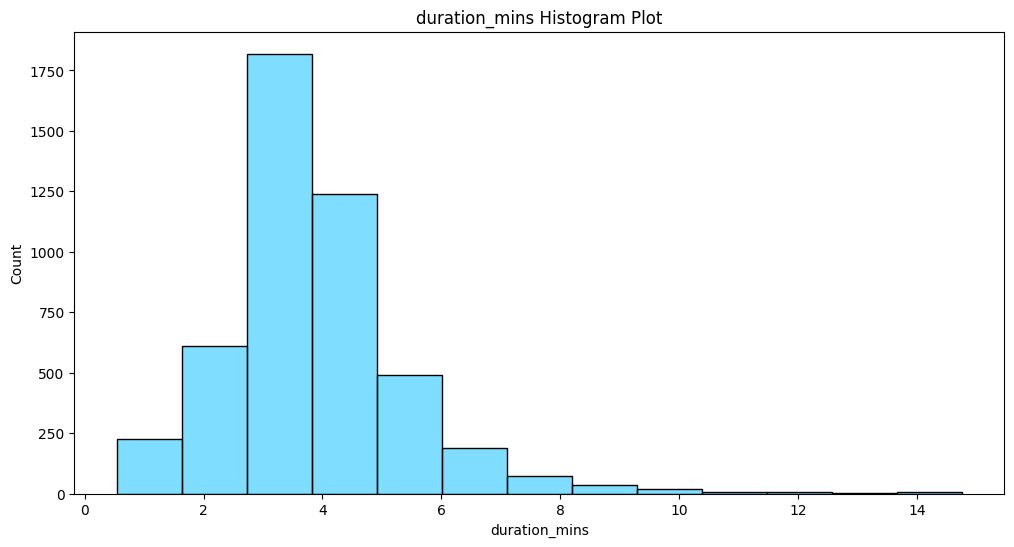

In [55]:
hist_plot(df, 'duration_mins', normal_estimation=False, kde=False)

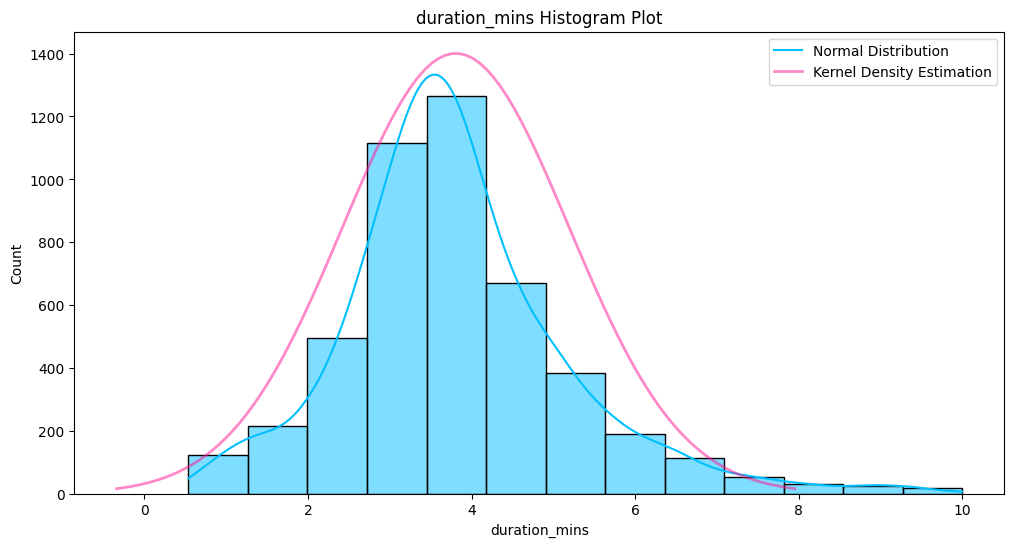

In [56]:
MAX_DURATION_MINS = 10

hist_plot((df[df['duration_mins'] < MAX_DURATION_MINS]), 'duration_mins')

As we can see, most of the songs have a duration between 2 and 5 minutes, which is expected.

### <a id='toc9_14_'></a>[Time Signature](#toc0_)

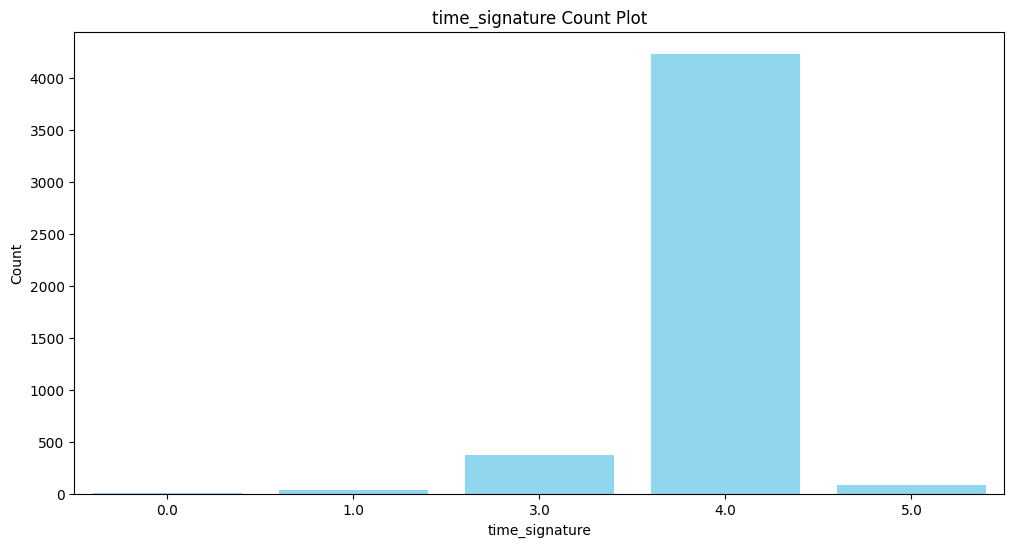

In [57]:
count_plot(df, 'time_signature', sorted=False)

As we can see, most of the songs in this dataset have time signature of 4 which is expected, because most of the songs (specially the western ones) are in 4/4 time signature.

### <a id='toc9_15_'></a>[Year](#toc0_)

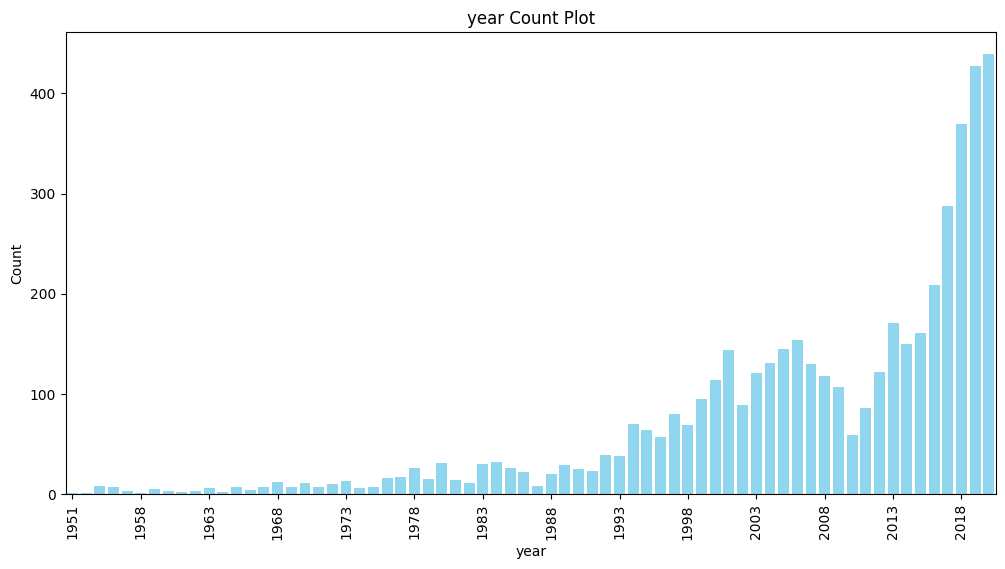

In [58]:
count_plot(df, 'year', step=5, sorted=False)

We can see the rising trend of the number of songs released over the years. This is expected because the music industry has been growing over the years.

### <a id='toc9_16_'></a>[Decade](#toc0_)

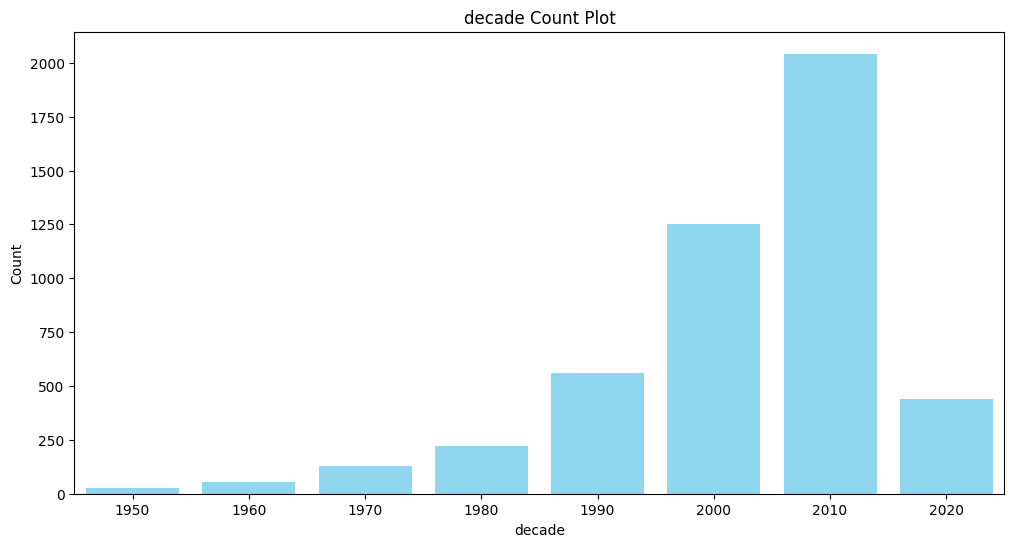

In [59]:
count_plot(df, 'decade', sorted=False)

### <a id='toc9_17_'></a>[Quarter](#toc0_)

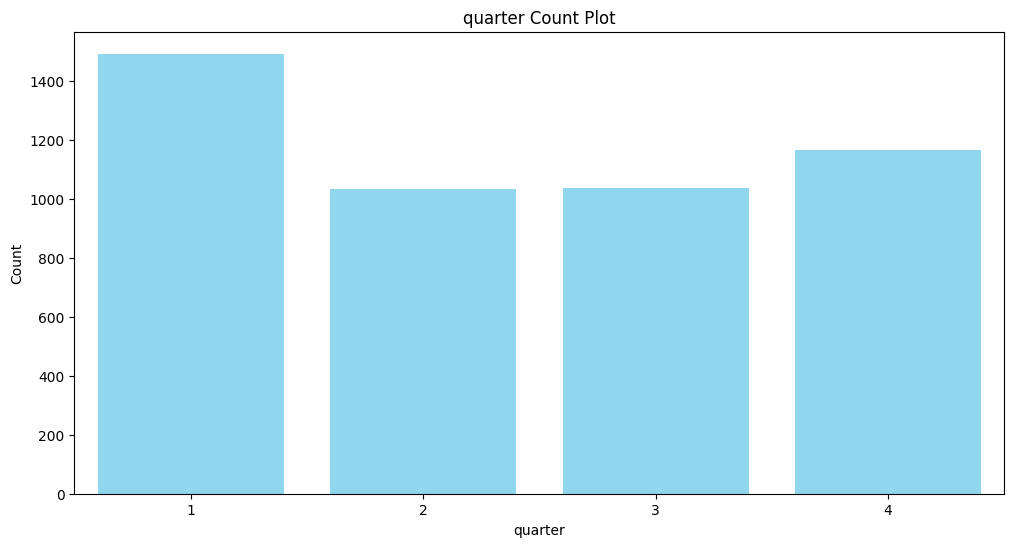

In [60]:
count_plot(df, 'quarter', sorted=False)

### <a id='toc9_18_'></a>[Month](#toc0_)

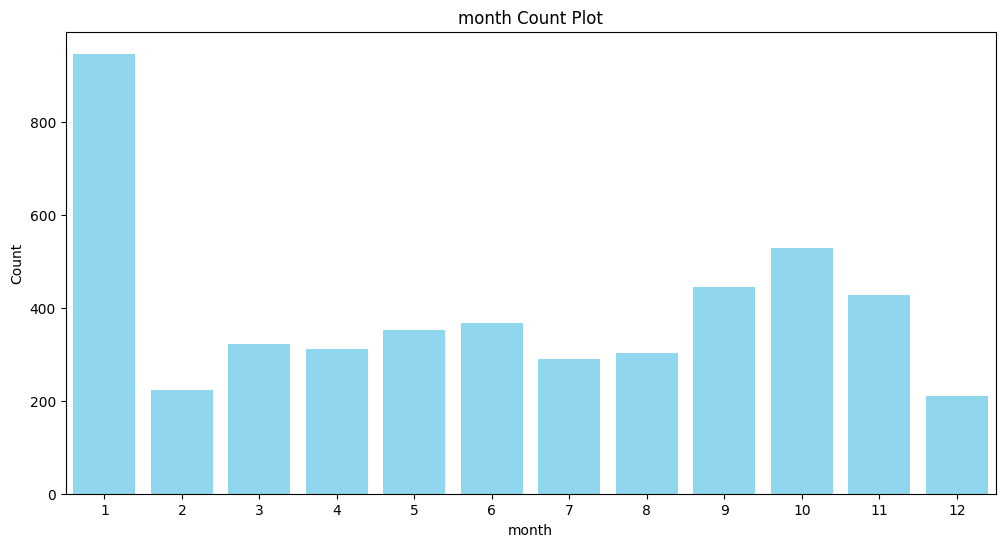

In [61]:
count_plot(df, 'month', sorted=False)

### <a id='toc9_19_'></a>[Week](#toc0_)

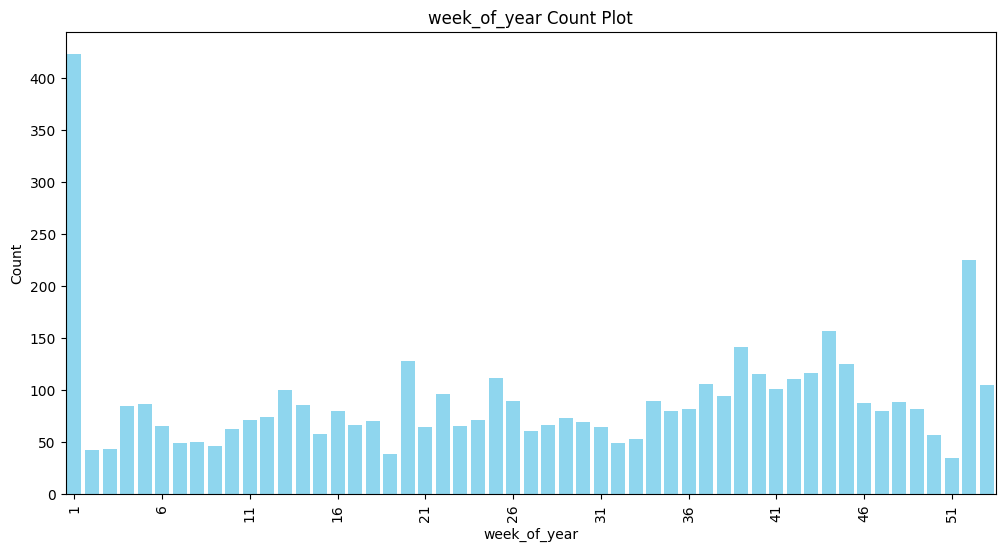

In [62]:
count_plot(df, 'week_of_year', step=5, sorted=False)

As we can see, most of the songs are released in first and last weeks of the year. One reason for this could be that the first week of the year is a popular time for new releases, and the last week of the year is a popular time for holiday music. 

Other reason for this observation is that information about a lot of tracks in this dataset (specially the older ones) could be inaccurate, for example only the release year of an old track is known and not the exact date.

### <a id='toc9_20_'></a>[Day](#toc0_)

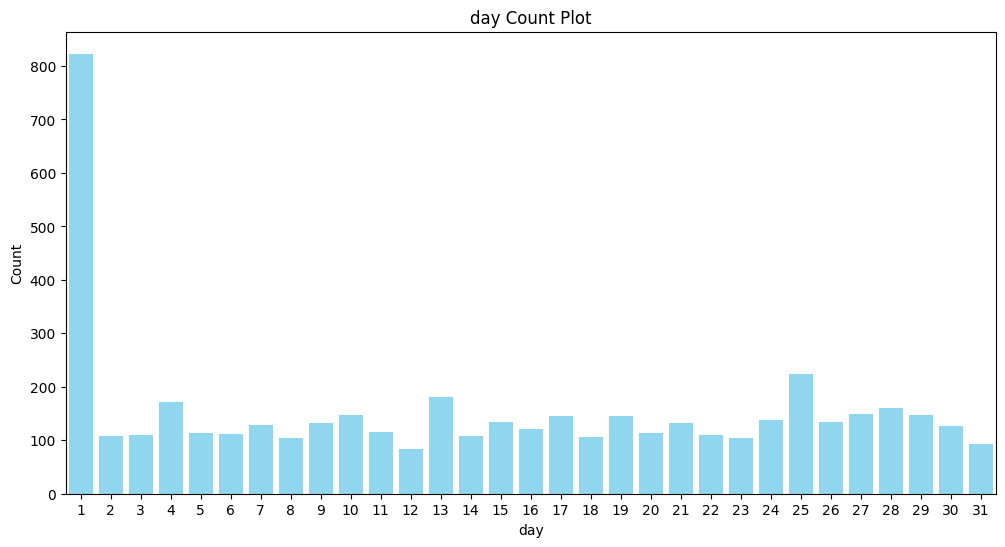

In [63]:
count_plot(df, 'day', sorted=False)

For older tracks, especially those from the 20th century, there might be less accurate or readily available information about their exact release dates. Streaming services or data providers might not have access to this information or might not have it recorded in a consistent format.

In cases where the exact release date is unknown, some data providers might assign a default value for consistency. The first day of the month (often coded as "01-01") might be a common placeholder used for these tracks.


### <a id='toc9_21_'></a>[Weekday](#toc0_)

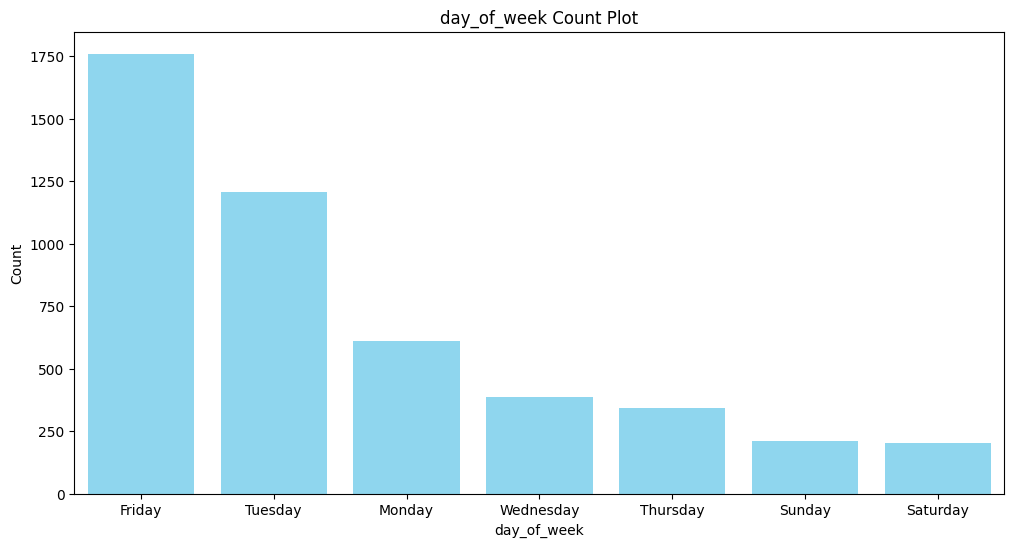

In [64]:
count_plot(df, 'day_of_week')

As we can see, most of the songs are released on Tuesdays and Fridays. Traditionally, Fridays were the preferred day for new music releases. Tuesdays might serve as a secondary release day to avoid competing with the established "New Music Friday" trend.

As we can see, nowadays most of the songs are released on Fridays. This is because Friday is the most popular day for new music releases. Artists and record labels often release new music on Fridays to take advantage of the weekend, when people have more time to listen to music.

### <a id='toc9_22_'></a>[Artist Count](#toc0_)

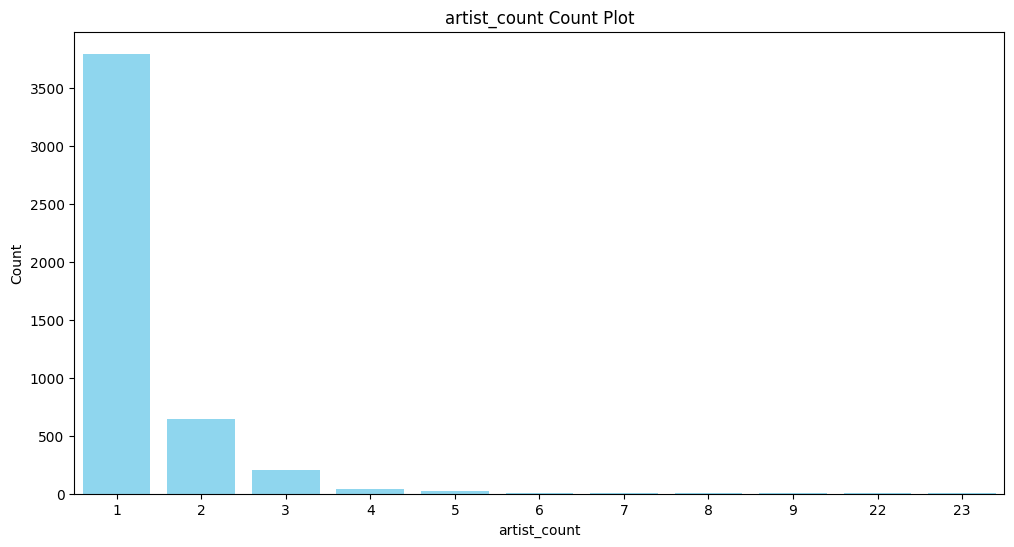

In [65]:
count_plot(df, 'artist_count', sorted=False)

### <a id='toc9_23_'></a>[Genre Count](#toc0_)

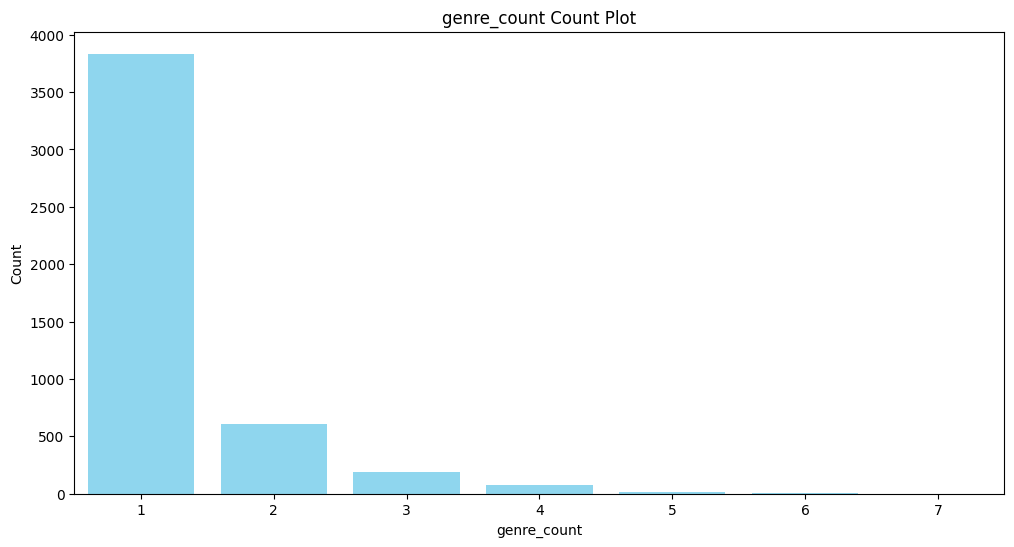

In [66]:
count_plot(df, 'genre_count', sorted=False)

### <a id='toc9_24_'></a>[Popularity](#toc0_)

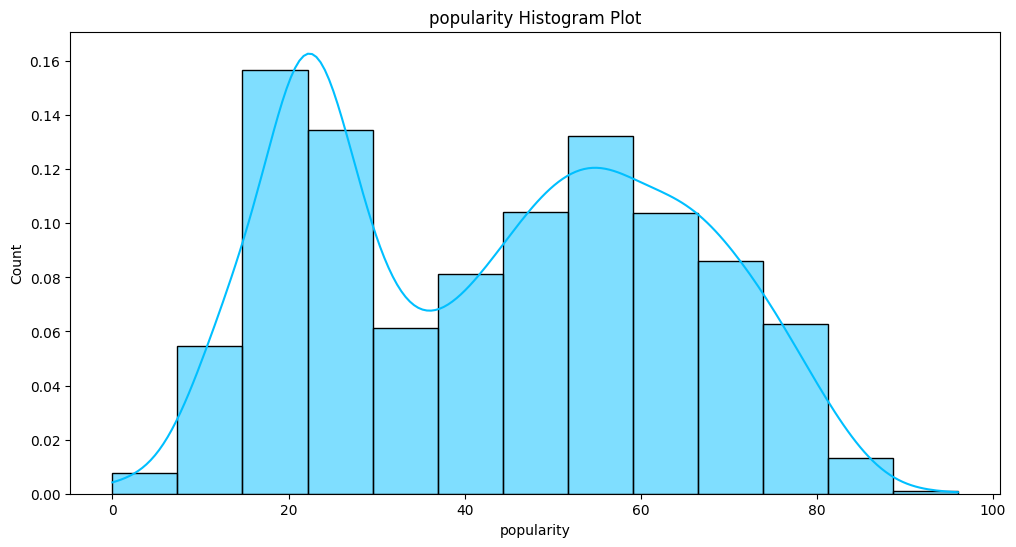

In [67]:
hist_plot(df, 'popularity', normal_estimation=False, stat='proportion')

## <a id='toc10_'></a>[Top Records](#toc0_)

In [68]:
TOP_RECORDS_COUNT = 5
TOP_RECORDS_COUNT_FOR_PLOTS = 10

### <a id='toc10_1_'></a>[The Most Danceable Songs](#toc0_)

In [69]:
sorted_df = df.sort_values('danceability', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
3689,Dancing in My Room,Dancing in My Room,[347aidan],True,8,0,4.0,0.980,0.413,-11.052,...,44,26,Monday,300,3.002317,180139,1,1,[sad],74
3385,Junoka,Junoka EP,[Marek Hemmann],False,11,0,5.0,0.971,0.334,-12.720,...,35,29,Friday,242,6.545117,392707,1,1,[minimal-techno],20
4103,Poor People Must Work,See Mi Yah,[Rhythm & Sound],False,1,0,4.0,0.961,0.296,-13.547,...,10,11,Friday,70,3.492217,209533,1,1,[minimal-techno],17
2446,ATTENTION!,Bad Vibes Forever,[XXXTENTACION],True,0,1,4.0,0.954,0.410,-7.725,...,49,6,Friday,340,2.000917,120055,1,1,[emo],69
1177,The Penguin Dance,Pinkfong Animal Songs,[Pinkfong],False,1,1,4.0,0.947,0.959,-3.158,...,30,27,Thursday,208,1.824217,109453,1,1,[children],53


### <a id='toc10_2_'></a>[The Most Valence Songs](#toc0_)

In [70]:
sorted_df = df.sort_values('valence', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
1073,Randy Lynn Rag,Foggy Mountain Jamboree (Expanded Edition),[Flatt & Scruggs],False,8,1,4.0,0.386,0.752,-9.789,...,1,1,Tuesday,1,2.06600,123960,1,1,[bluegrass],21
520,Can't Get Enough! - Vocal Club Mix,Can't Get Enough!,[Soulsearcher],False,4,0,4.0,0.742,0.973,-6.425,...,1,1,Thursday,1,6.83200,409920,1,2,"[deep-house, disco]",32
2675,Corrine Corrina,The Essential Floyd Cramer,[Floyd Cramer],False,0,1,4.0,0.581,0.798,-11.153,...,52,1,Sunday,1,2.55845,153507,1,1,[honky-tonk],16
427,Foggy Mountain Special,Columbia Records Country Music Foundation Heri...,[Flatt & Scruggs],False,8,1,4.0,0.618,0.497,-10.434,...,1,1,Tuesday,1,2.01400,120840,1,1,[bluegrass],24
2429,LUV U NEED U,LUV U NEED U,[Slushii],False,1,0,4.0,0.774,0.810,-2.984,...,24,12,Monday,163,2.44515,146709,1,1,[electronic],54


### <a id='toc10_3_'></a>[The Least Valence Songs](#toc0_)

In [71]:
sorted_df = df.sort_values('valence', ascending=True)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
1633,Mute,Full of Hell & Merzbow,[Full Of Hell],False,6,1,4.0,0.2000,0.4720,-3.390,...,48,25,Tuesday,329,0.554767,33286,1,1,[grindcore],17
4152,Le bourgeois gentilhomme: Chaconne des Scaramo...,Lully: Ballet Music for the Sun King,"[Jean-Baptiste Lully, Mary Enid Haines, Sharla...",False,6,1,0.0,0.0000,0.0192,-28.821,...,19,4,Monday,124,1.469333,88160,5,1,[opera],51
1792,Humming Miter,Full of Hell & Merzbow,[Full Of Hell],False,7,0,4.0,0.0679,0.9970,-4.135,...,48,25,Tuesday,329,0.729917,43795,1,1,[grindcore],16
833,As Darkness Tears the World Apart,Let the Devil In,[Sargeist],True,7,0,4.0,0.1270,0.9710,-6.834,...,45,9,Tuesday,313,3.924000,235440,1,1,[black-metal],17
2514,Bitch's Handbag Full of Money,Frozen Corpse Stuffed With Dope,[Agoraphobic Nosebleed],True,4,0,4.0,0.3240,0.9980,-2.790,...,24,11,Tuesday,162,0.571550,34293,1,1,[grindcore],13


### <a id='toc10_4_'></a>[The Most Energetic Songs](#toc0_)

In [72]:
sorted_df = df.sort_values('energy', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
1576,Kill Theme for American Apeshit,Frozen Corpse Stuffed With Dope,[Agoraphobic Nosebleed],True,6,1,4.0,0.234,0.999,-1.990,...,24,11,Tuesday,162,1.043550,62613,1,1,[grindcore],19
818,Hyperforms,Dingir,[Rings of Saturn],False,7,1,4.0,0.509,0.999,-2.001,...,6,5,Tuesday,36,3.839550,230373,1,1,[death-metal],20
342,Back On a Mission,Back on a Mission,[CIRRUS],False,7,1,4.0,0.661,0.998,-3.746,...,1,1,Thursday,1,3.629333,217760,1,1,[breakbeat],35
2138,An Exposition of Insides,Medium Rarities,[Cattle Decapitation],True,3,1,4.0,0.252,0.998,-3.310,...,47,23,Friday,327,3.525567,211534,1,1,[grindcore],12
2514,Bitch's Handbag Full of Money,Frozen Corpse Stuffed With Dope,[Agoraphobic Nosebleed],True,4,0,4.0,0.324,0.998,-2.790,...,24,11,Tuesday,162,0.571550,34293,1,1,[grindcore],13


### <a id='toc10_5_'></a>[The Loudest Songs](#toc0_)

In [73]:
sorted_df = df.sort_values('loudness', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
2622,Behemoth VIP,VOYD Vol. 1.5,[SVDDEN DEATH],False,10,0,4.0,0.849,0.878,-0.072,...,32,9,Friday,221,1.914283,114857,1,2,"[dub, dubstep]",53
3096,PONPONPON,ぱみゅぱみゅレボリューション,[Kyary Pamyu Pamyu],False,4,1,4.0,0.634,0.988,-0.201,...,2,11,Wednesday,11,4.047117,242827,1,1,[j-idol],55
2267,Bleed,VOYD Vol. 1.5,[SVDDEN DEATH],False,8,1,4.0,0.596,0.969,-0.262,...,32,9,Friday,221,2.285717,137143,1,1,[dubstep],48
2516,Wobble,Wobble,"[Crankdat, Tisoki]",True,1,1,4.0,0.623,0.985,-0.319,...,39,27,Thursday,270,3.133333,188000,2,2,"[dub, dubstep]",48
1474,Confusion Spell,Confusion Spell,[SVDDEN DEATH],False,11,1,4.0,0.731,0.950,-0.411,...,21,18,Monday,139,2.285717,137143,1,2,"[dub, dubstep]",50


### <a id='toc10_6_'></a>[The Quietest Songs](#toc0_)

In [74]:
sorted_df = df.sort_values('loudness', ascending=True)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
4533,Pony Girl,Fun Home (A New Broadway Musical),[Michael Cerveris],False,1,1,4.0,0.514,0.00896,-36.905,...,21,19,Tuesday,139,0.768883,46133,1,1,[show-tunes],20
1498,Carmen Suite No. 1 (Arr. E. Guiraud): IV. Ségu...,Bizet: Carmen & L'arlésienne Suites,"[Georges Bizet, Orquestra Simfònica de Barcelo...",False,2,1,3.0,0.248,0.00674,-36.547,...,41,13,Friday,286,2.032217,121933,3,2,"[french, opera]",60
131,"The Hours: An Unwelcome Friend (From ""The Hours"")","Philip Glass: Glassworlds, Vol. 4 – On Love","[Philip Glass, Nicolas Horvath]",False,7,0,3.0,0.253,0.00429,-36.172,...,23,10,Friday,162,4.269117,256147,2,1,[ambient],59
3666,Safe and Sound,Sleep Deeply,[Dan Gibsons Solitudes],False,7,1,4.0,0.292,0.00847,-34.663,...,44,30,Wednesday,303,7.463783,447827,1,1,[new-age],35
3621,"River Dawn, Part 1",River Dawn: Piano Meditations,[Catherine Marie Charlton],False,3,1,4.0,0.405,0.01260,-33.798,...,1,1,Monday,1,7.054667,423280,1,1,[new-age],26


### <a id='toc10_7_'></a>[The Longest Songs](#toc0_)

In [75]:
sorted_df = df.sort_values('duration_ms', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
3340,Pluie de Velours,Natural Anti-Stress,[Dan Gibsons Solitudes],False,4,1,5.0,0.0738,0.0774,-26.203,...,49,3,Tuesday,337,14.762450,885747,1,1,[new-age],20
3553,Courant Qui S'Ecoule,Natural Anti-Stress,[Dan Gibsons Solitudes],False,6,1,5.0,0.1480,0.2160,-22.944,...,49,3,Tuesday,337,14.669183,880151,1,1,[new-age],20
738,Celestite Mirror,Celestite,[Wolves In The Throne Room],False,9,0,4.0,0.0668,0.4000,-12.792,...,28,8,Tuesday,189,14.539967,872398,1,1,[black-metal],17
3055,Whoblo,Soup,[Bola],False,0,0,4.0,0.6240,0.5460,-19.056,...,9,1,Sunday,60,13.860000,831600,1,1,[idm],10
3101,Kepler,Scope,[Nobukazu Takemura],False,9,1,4.0,0.5120,0.5410,-16.636,...,23,8,Tuesday,159,13.704450,822267,1,1,[idm],13


### <a id='toc10_8_'></a>[The Shortest Songs](#toc0_)

In [76]:
sorted_df = df.sort_values('duration_ms', ascending=True)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
2391,Elfin,38 Counts of Battery,[Pig Destroyer],True,10,0,4.0,0.313,0.919,-5.822,...,48,28,Tuesday,333,0.538450,32307,1,1,[grindcore],12
688,Universal Fanfare,Minions (Original Motion Picture Soundtrack),[The Minions],False,8,1,4.0,0.428,0.497,-10.311,...,28,10,Friday,191,0.540300,32418,1,1,[children],57
769,Metal Fans,Fart and Wiener Jokes,[Brian Posehn],False,7,1,3.0,0.719,0.571,-9.292,...,17,27,Tuesday,117,0.549783,32987,1,1,[comedy],27
3134,Parliament Of Aliens Part III,Dimensional People,"[Mouse On Mars, Bryce Dessner]",False,2,1,5.0,0.548,0.378,-13.835,...,15,13,Friday,103,0.553383,33203,2,1,[idm],16
1633,Mute,Full of Hell & Merzbow,[Full Of Hell],False,6,1,4.0,0.200,0.472,-3.390,...,48,25,Tuesday,329,0.554767,33286,1,1,[grindcore],17


### <a id='toc10_9_'></a>[Songs with the Highest Tempo](#toc0_)

In [77]:
sorted_df = df.sort_values('tempo', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
4276,Love Me Land,Love Me Land,[Zara Larsson],False,2,0,4.0,0.302,0.481,-7.023,...,28,10,Friday,192,2.663500,159810,1,1,[swedish],56
4331,Gettin' Ready Rag,Ragtime: The Musical (Original Broadway Cast R...,"[Brian Stokes Mitchell, Ragtime Ensemble]",False,8,1,4.0,0.383,0.685,-7.205,...,1,1,Thursday,1,1.326667,79600,2,1,[show-tunes],21
1512,Mama,The Black Parade,[My Chemical Romance],True,4,0,4.0,0.236,0.799,-5.167,...,43,23,Monday,296,4.650450,279027,1,2,"[emo, punk]",69
4500,Eu Te Achei - Ao Vivo,Gusttavo Lima e Você (Ao Vivo),[Gusttavo Lima],False,7,1,4.0,0.374,0.562,-6.393,...,38,20,Tuesday,263,3.232883,193973,1,1,[sertanejo],46
2871,93 'Til Infinity,93 'til Infinity,[Souls Of Mischief],False,1,1,4.0,0.590,0.672,-11.792,...,6,13,Saturday,44,4.774000,286440,1,2,"[hardcore, jazz]",71


### <a id='toc10_10_'></a>[Songs with the Lowest Tempo](#toc0_)

In [78]:
sorted_df = df.sort_values('tempo', ascending=True)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
4152,Le bourgeois gentilhomme: Chaconne des Scaramo...,Lully: Ballet Music for the Sun King,"[Jean-Baptiste Lully, Mary Enid Haines, Sharla...",False,6,1,0.0,0.000,0.0192,-28.821,...,19,4,Monday,124,1.469333,88160,5,1,[opera],51
4062,Reconciliation,AMBROSIA,[Peter Kater],False,5,0,4.0,0.149,0.0952,-17.724,...,1,1,Tuesday,1,4.518217,271093,1,1,[new-age],23
1293,Love Is Blindness,Sixteen Saltines,[Jack White],False,10,0,4.0,0.266,0.7400,-7.972,...,28,10,Tuesday,192,3.310217,198613,1,3,"[blues, garage, punk-rock]",56
3206,In Dreams,Until the End,[Kittie],False,0,1,4.0,0.103,0.8190,-2.807,...,31,27,Tuesday,209,3.263117,195787,1,1,[industrial],22
3528,For Tammi,Fairy Lullabies,[Gary Stadler],False,0,1,4.0,0.231,0.0404,-21.792,...,52,1,Sunday,1,4.412667,264760,1,1,[new-age],22


### <a id='toc10_11_'></a>[The Oldest Songs](#toc0_)

In [79]:
sorted_df = df.sort_values('year', ascending=True)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
133,I'm Working On a Road,Foggy Mountain Gospel,[Flatt & Scruggs],False,8,1,4.0,0.624,0.234,-13.320,...,1,1,Monday,1,2.820450,169227,1,1,[bluegrass],22
427,Foggy Mountain Special,Columbia Records Country Music Foundation Heri...,[Flatt & Scruggs],False,8,1,4.0,0.618,0.497,-10.434,...,1,1,Tuesday,1,2.014000,120840,1,1,[bluegrass],24
3033,Long Black Veil,Columbia Country Classics Volume 3: Americana,[Lefty Frizzell],False,4,1,4.0,0.517,0.232,-17.093,...,53,1,Friday,1,3.031117,181867,1,1,[honky-tonk],14
1682,Hace un Año,Serie De Coleccion 15 Autenticos,[Cuco Sánchez],False,5,1,3.0,0.508,0.118,-16.519,...,53,1,Friday,1,3.417333,205040,1,1,[guitar],23
2426,La Que Sea,Serie De Coleccion 15 Autenticos,[Cuco Sánchez],False,7,1,5.0,0.547,0.106,-18.331,...,53,1,Friday,1,3.020000,181200,1,1,[guitar],23


### <a id='toc10_12_'></a>[Songs with the Most Artists](#toc0_)

In [80]:
sorted_df = df.sort_values('artist_count', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
4033,Aida: Act II: Marcia,Verdi: Aida,"[Giuseppe Verdi, Maria Dragoni, Kristjan Johan...",False,8,1,4.0,0.307,0.107,-20.164,...,23,8,Thursday,159,1.577783,94667,23,1,[opera],50
4274,Almost Like Praying (feat. Artists for Puerto ...,Almost Like Praying (feat. Artists for Puerto ...,"[Lin-Manuel Miranda, Alex Lacamoire, Ana Villa...",False,5,0,4.0,0.471,0.791,-3.373,...,40,6,Friday,279,3.340950,200457,22,1,[show-tunes],51
4307,Everybody's Got the Right,Assassins (The Broadway Cast Recording),"[Michael Cerveris, James Barbour, Becky Ann Ba...",False,6,1,4.0,0.597,0.341,-7.968,...,32,3,Tuesday,216,2.536667,152200,9,1,[show-tunes],21
1571,"Maybe It’s Time (feat. Corey Taylor, Joe Ellio...","Maybe It’s Time (feat. Corey Taylor, Joe Ellio...","[Sixx:A.M., Corey Taylor, Joe Elliott, Brantle...",False,0,1,4.0,0.396,0.781,-5.148,...,34,21,Friday,234,4.236683,254201,8,1,[grunge],55
4425,Seasons of Love,RENT (Original Motion Picture Soundtrack),"[Rosario Dawson, Taye Diggs, Idina Menzel, Jes...",False,5,1,4.0,0.475,0.579,-4.096,...,39,27,Tuesday,270,3.045783,182747,8,1,[show-tunes],59


### <a id='toc10_13_'></a>[The Most Popular Songs](#toc0_)

In [81]:
sorted_df = df.sort_values('popularity', ascending=False)
sorted_df.head(TOP_RECORDS_COUNT)

,track_name,album_name,artists,explicit,key,mode,time_signature,danceability,energy,loudness,...,week_of_year,day,day_of_week,day_of_year,duration_mins,duration_ms,artist_count,genre_count,track_genre,popularity
447,Under The Influence,Indigo (Extended),[Chris Brown],True,9,0,4.0,0.733,0.690,-5.529,...,40,4,Friday,277,3.076883,184613,1,2,"[dance, pop]",96
979,Sweater Weather,I Love You.,[The Neighbourhood],False,10,1,4.0,0.612,0.807,-2.810,...,16,19,Friday,109,4.006667,240400,1,4,"[alt-rock, alternative, pop, rock]",93
2350,I Wanna Be Yours,AM,[Arctic Monkeys],False,0,0,4.0,0.464,0.417,-9.345,...,37,9,Monday,252,3.065933,183956,1,3,"[garage, indie, rock]",92
8,One Kiss (with Dua Lipa),One Kiss (with Dua Lipa),"[Calvin Harris, Dua Lipa]",False,9,0,4.0,0.791,0.862,-3.240,...,14,6,Friday,96,3.580783,214847,2,5,"[dance, electro, house, pop, progressive-house]",89
3494,Watermelon Sugar,Fine Line,[Harry Styles],False,0,1,4.0,0.548,0.816,-4.209,...,50,13,Friday,347,2.900000,174000,1,1,[pop],89


In [82]:
def show_barplot(df, x, y, figsize=(12, 6), xlabel=None, ylabel=None, title=None, step=None):
	if xlabel is None:
		xlabel = x
	if ylabel is None:
		ylabel = y
	if title is None:
		title = f'{y} by {x} Bar Plot'

	plt.figure(figsize=figsize)
	sns.barplot(data=df, x=x, y=y, color='deepskyblue', alpha=0.5)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.title(title)
	if step is not None:
		plt.xticks = plt.xticks()[0][::step]
	plt.show()

### <a id='toc10_14_'></a>[Artists with the Most Songs](#toc0_)

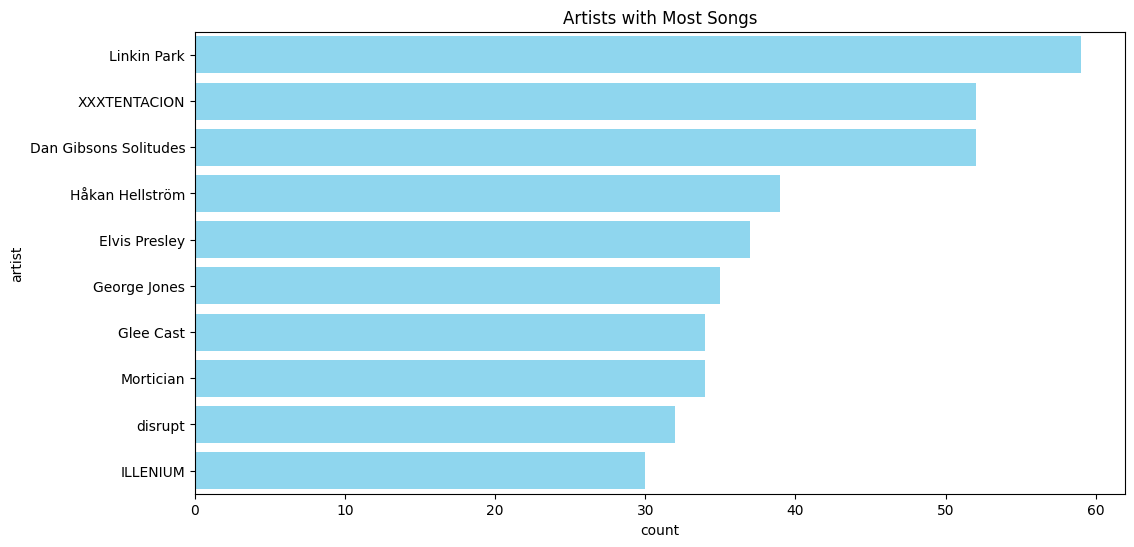

In [83]:
artists_song_count = df.explode('artists')['artists'].value_counts().reset_index()
artists_song_count.columns = ['artist', 'count']
artists_with_most_songs = artists_song_count.head(TOP_RECORDS_COUNT_FOR_PLOTS)
show_barplot(artists_with_most_songs, 'count', 'artist', title='Artists with Most Songs')

### <a id='toc10_15_'></a>[Artists with the Most Albums](#toc0_)

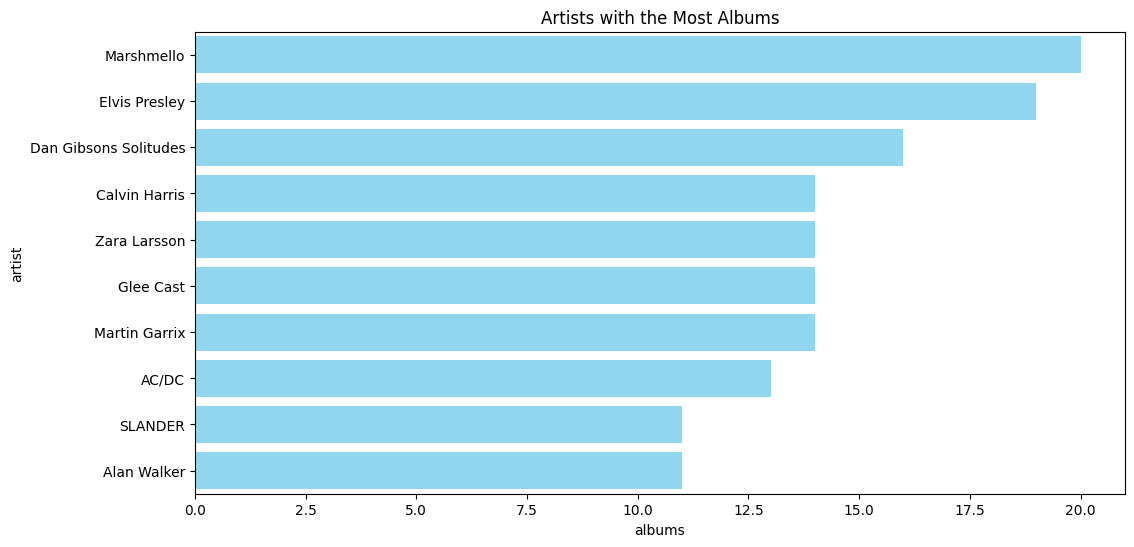

In [84]:
artist_album_count = df.explode('artists').groupby('artists')['album_name'].nunique().reset_index()
artist_album_count.columns = ['artist', 'albums']
artists_with_most_albums = artist_album_count.sort_values(by='albums', ascending=False).head(TOP_RECORDS_COUNT_FOR_PLOTS)
show_barplot(artists_with_most_albums, 'albums', 'artist', title='Artists with the Most Albums')

### <a id='toc10_16_'></a>[Albums with the Most Songs](#toc0_)

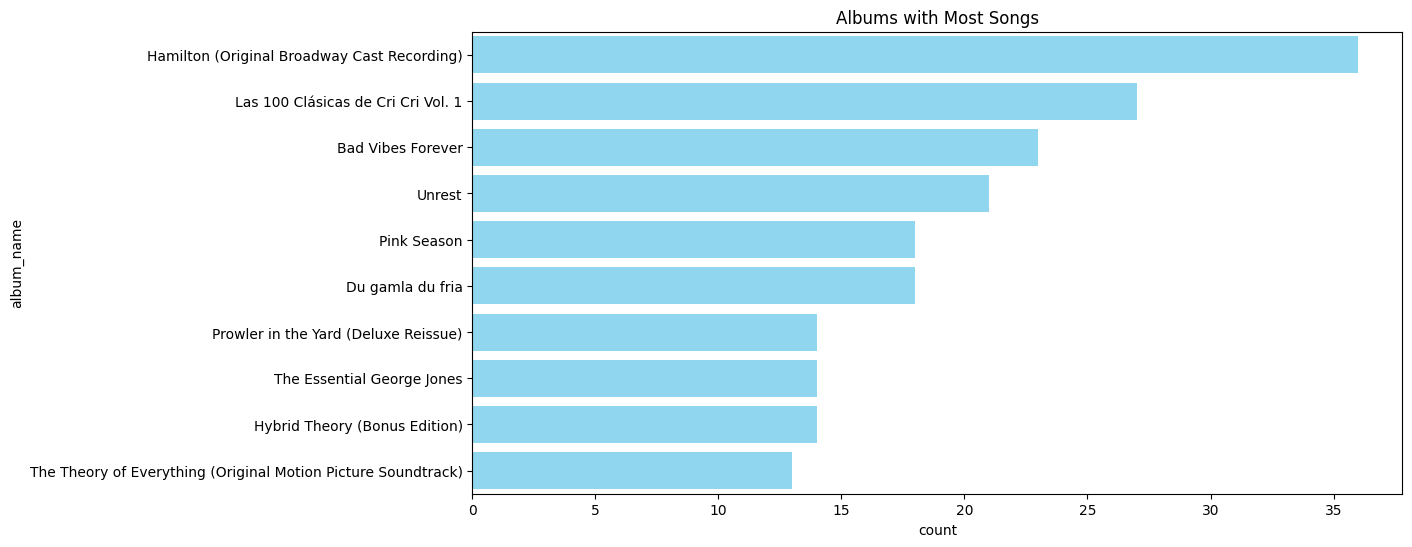

In [85]:
albums_with_most_songs = df.groupby('album_name').size().reset_index(name='count')
albums_with_most_songs = albums_with_most_songs.sort_values(by='count', ascending=False).head(TOP_RECORDS_COUNT_FOR_PLOTS)
show_barplot(albums_with_most_songs, 'count', 'album_name', title='Albums with Most Songs')

### <a id='toc10_17_'></a>[Artists with the Most Explicit Songs](#toc0_)

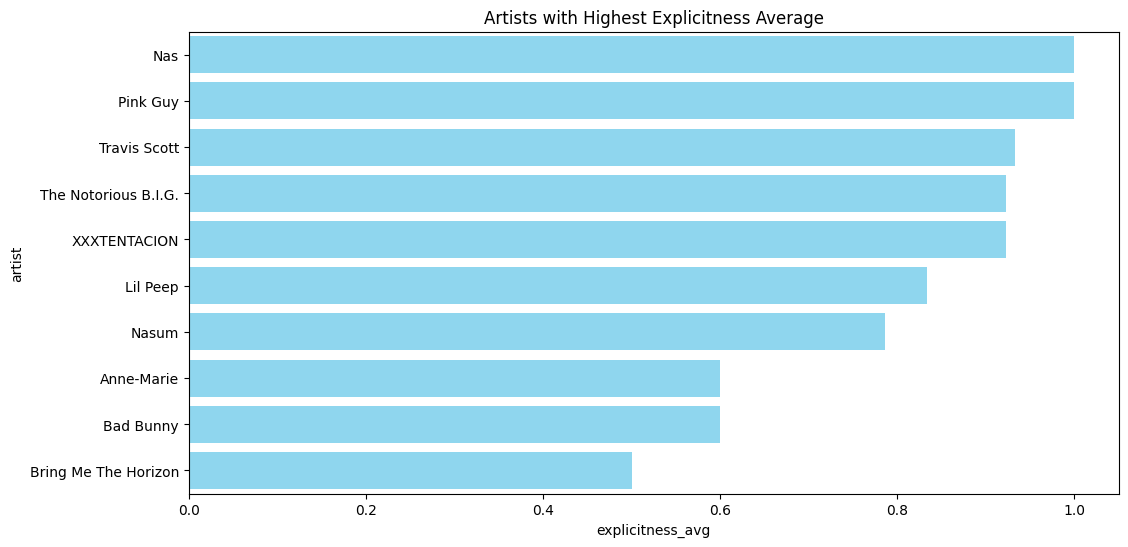

In [86]:
MIN_SONGS_COUNT = 10

df_exploded = df.explode('artists')
df_exploded['explicit'] = df_exploded['explicit'].map({True: 1, False: 0})
artists_explicitness_avg = df_exploded.groupby('artists')['explicit'].mean().reset_index()
artists_explicitness_avg.columns = ['artist', 'explicitness_avg']
artists_song_count = df_exploded['artists'].value_counts().reset_index()
artists_song_count.columns = ['artist', 'count']
filtered_artists = artists_song_count[artists_song_count['count'] >= MIN_SONGS_COUNT]
most_explicit_artists = pd.merge(artists_explicitness_avg, filtered_artists, on='artist')
most_explicit_artists = most_explicit_artists.nlargest(TOP_RECORDS_COUNT_FOR_PLOTS, 'explicitness_avg')
show_barplot(most_explicit_artists, 'explicitness_avg', 'artist', title='Artists with Highest Explicitness Average')

### <a id='toc10_18_'></a>[Artists with the Most Danceable Songs](#toc0_)

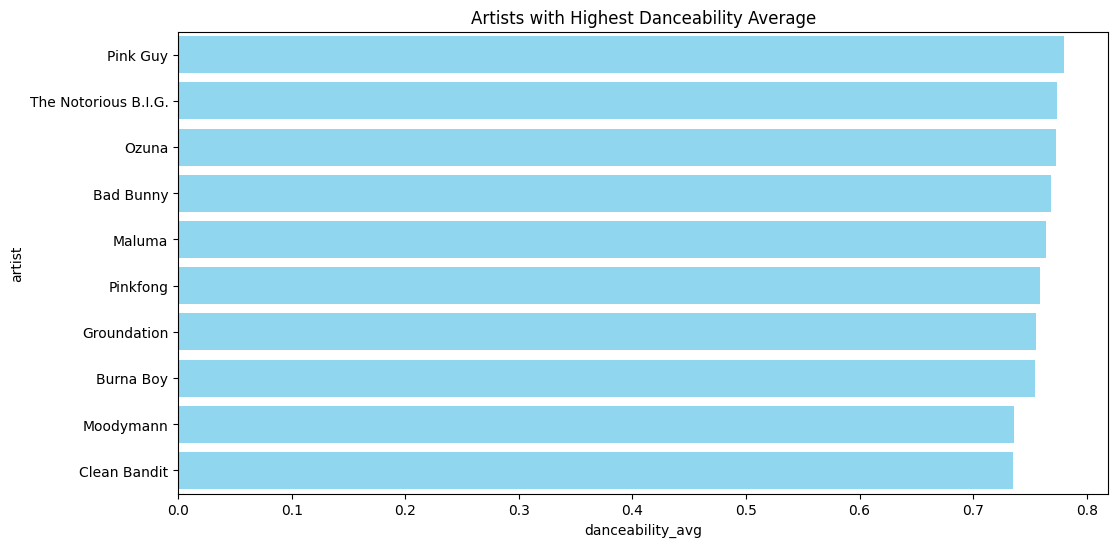

In [87]:
df_exploded = df.explode('artists')
artists_danceability_avg = df_exploded.groupby('artists')['danceability'].mean().reset_index()
artists_danceability_avg.columns = ['artist', 'danceability_avg']
filtered_artists = df_exploded['artists'].value_counts().reset_index()
filtered_artists.columns = ['artist', 'count']
filtered_artists = filtered_artists[filtered_artists['count'] >= MIN_SONGS_COUNT]
artists_danceability_avg = pd.merge(artists_danceability_avg, filtered_artists, on='artist')
most_danceable_artists = artists_danceability_avg.nlargest(TOP_RECORDS_COUNT_FOR_PLOTS, 'danceability_avg')
show_barplot(most_danceable_artists, 'danceability_avg', 'artist', title='Artists with Highest Danceability Average')

### <a id='toc10_19_'></a>[Artists with the Loudest Songs](#toc0_)

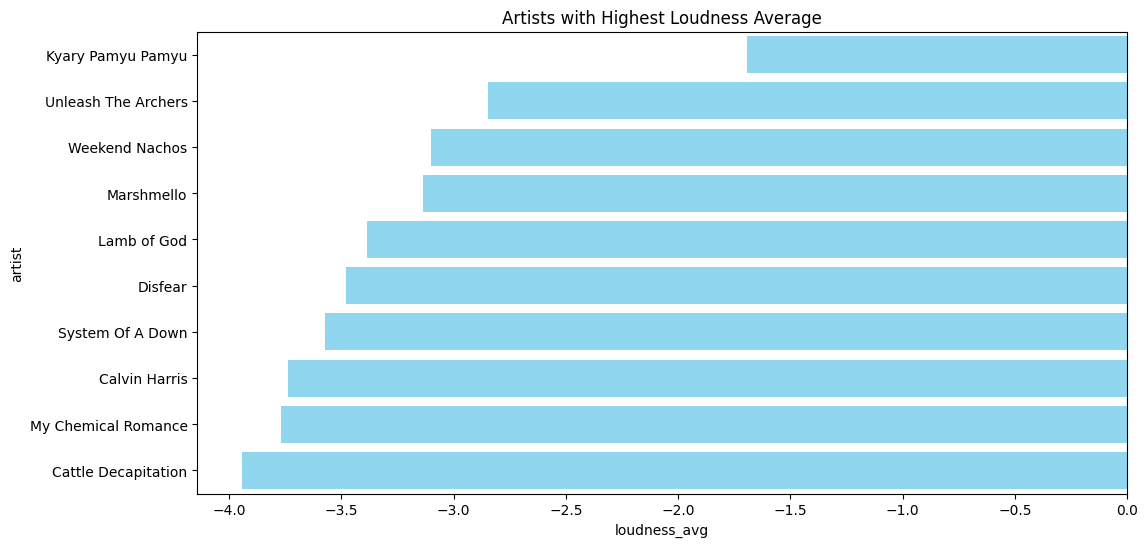

In [88]:
df_exploded = df.explode('artists')
artists_loudness_avg = df_exploded.groupby('artists')['loudness'].mean().reset_index()
artists_loudness_avg.columns = ['artist', 'loudness_avg']
filtered_artists = df_exploded['artists'].value_counts().reset_index()
filtered_artists.columns = ['artist', 'count']
filtered_artists = filtered_artists[filtered_artists['count'] >= MIN_SONGS_COUNT]
artists_loudness_avg = pd.merge(artists_loudness_avg, filtered_artists, on='artist')
most_loud_artists = artists_loudness_avg.nlargest(TOP_RECORDS_COUNT_FOR_PLOTS, 'loudness_avg')
show_barplot(most_loud_artists, 'loudness_avg', 'artist', title='Artists with Highest Loudness Average')

### <a id='toc10_20_'></a>[Artists with the Most Popular Songs](#toc0_)

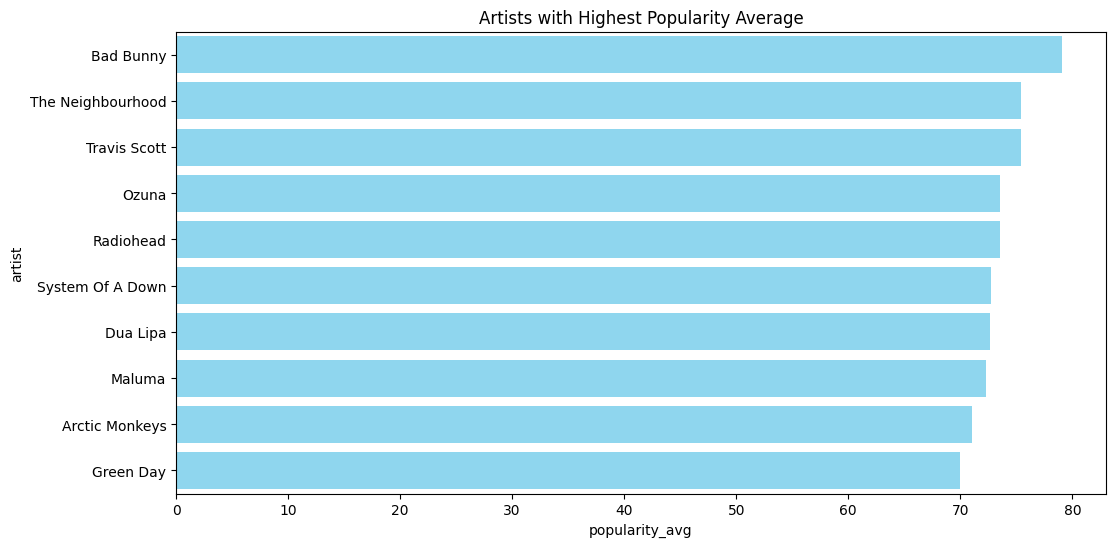

In [89]:
df_exploded = df.explode('artists')
artists_valence_avg = df_exploded.groupby('artists')['popularity'].mean().reset_index()
artists_valence_avg.columns = ['artist', 'popularity_avg']
filtered_artists = df_exploded['artists'].value_counts().reset_index()
filtered_artists.columns = ['artist', 'count']
filtered_artists = filtered_artists[filtered_artists['count'] >= MIN_SONGS_COUNT]
artists_valence_avg = pd.merge(artists_valence_avg, filtered_artists, on='artist')
most_popular_artists = artists_valence_avg.nlargest(TOP_RECORDS_COUNT_FOR_PLOTS, 'popularity_avg')
show_barplot(most_popular_artists, 'popularity_avg', 'artist', title='Artists with Highest Popularity Average')


### <a id='toc10_21_'></a>[Genres with the Most Songs](#toc0_)

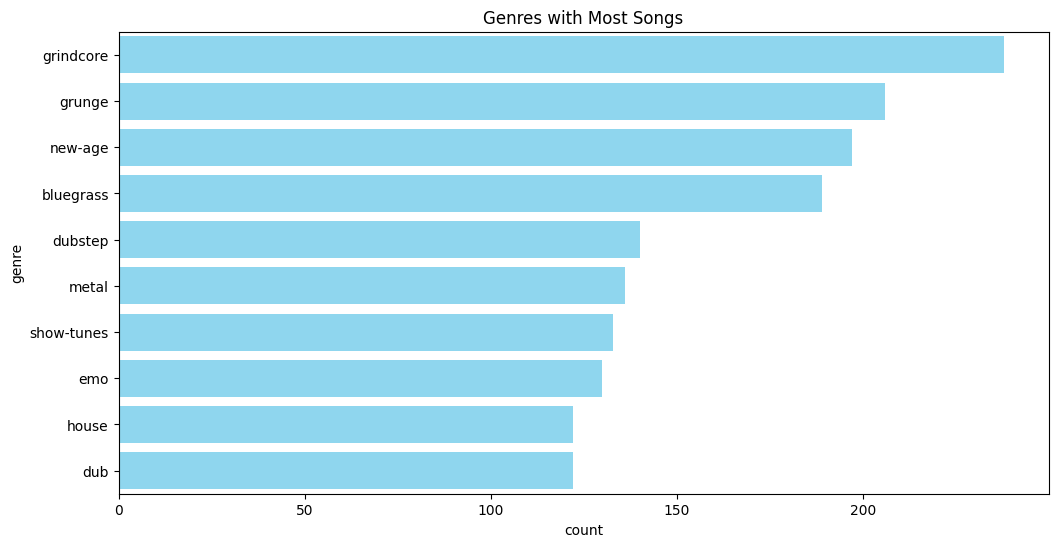

In [90]:
genres_song_count = df.explode('track_genre')['track_genre'].value_counts().reset_index()
genres_song_count.columns = ['genre', 'count']
genres_with_most_songs = genres_song_count.head(TOP_RECORDS_COUNT_FOR_PLOTS)
show_barplot(genres_with_most_songs, 'count', 'genre', title='Genres with Most Songs')

### <a id='toc10_22_'></a>[The Most Explicit Genres](#toc0_)

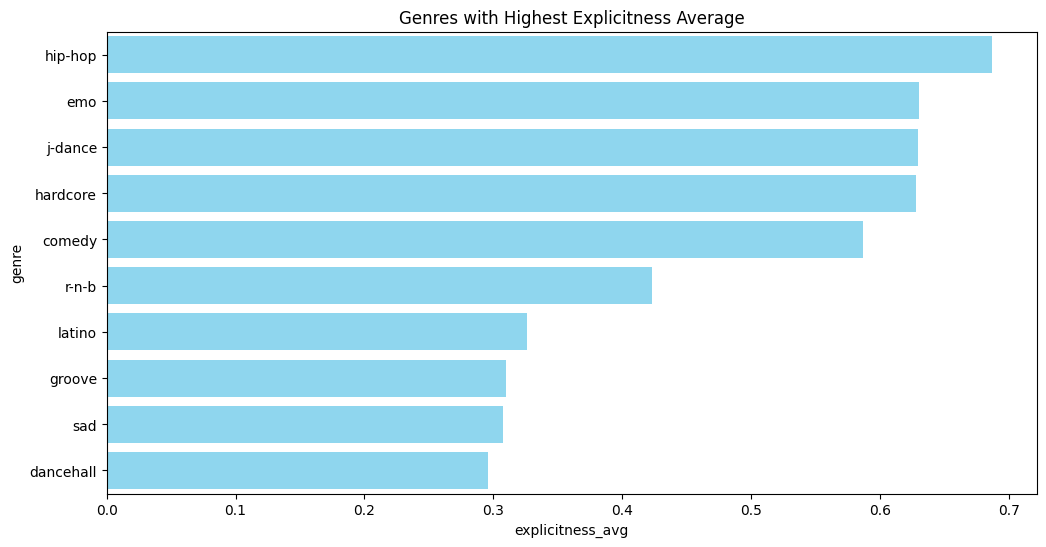

In [91]:
genres_explicitness_avg = df.explode('track_genre')
genres_explicitness_avg['explicit'] = genres_explicitness_avg['explicit'].map({True: 1, False: 0})
genres_explicitness_avg = genres_explicitness_avg.groupby('track_genre')['explicit'].mean().reset_index()
genres_explicitness_avg.columns = ['genre', 'explicitness_avg']
genres_song_count = df.explode('track_genre')['track_genre'].value_counts().reset_index()
genres_song_count.columns = ['genre', 'count']
filtered_genres = genres_song_count[genres_song_count['count'] >= MIN_SONGS_COUNT]
most_explicit_genres = pd.merge(genres_explicitness_avg, filtered_genres, on='genre')
most_explicit_genres = most_explicit_genres.nlargest(TOP_RECORDS_COUNT_FOR_PLOTS, 'explicitness_avg')
show_barplot(most_explicit_genres, 'explicitness_avg', 'genre', title='Genres with Highest Explicitness Average')

### <a id='toc10_23_'></a>[The Most Danceable Genres](#toc0_)

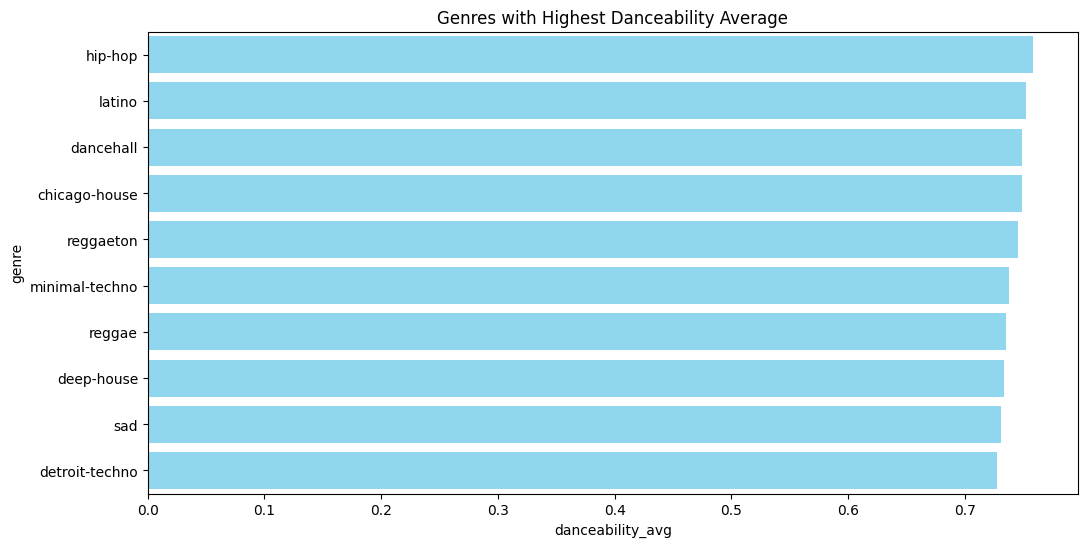

In [92]:
genres_danceability_avg = df.explode('track_genre').groupby('track_genre')['danceability'].mean().reset_index()
genres_danceability_avg.columns = ['genre', 'danceability_avg']
filtered_genres = df.explode('track_genre')['track_genre'].value_counts().reset_index()
filtered_genres.columns = ['genre', 'count']
filtered_genres = filtered_genres[filtered_genres['count'] >= MIN_SONGS_COUNT]
genres_danceability_avg = pd.merge(genres_danceability_avg, filtered_genres, on='genre')
most_danceable_genres = genres_danceability_avg.nlargest(TOP_RECORDS_COUNT_FOR_PLOTS, 'danceability_avg')
show_barplot(most_danceable_genres, 'danceability_avg', 'genre', title='Genres with Highest Danceability Average')

### <a id='toc10_24_'></a>[The Most Energetic Genres](#toc0_)

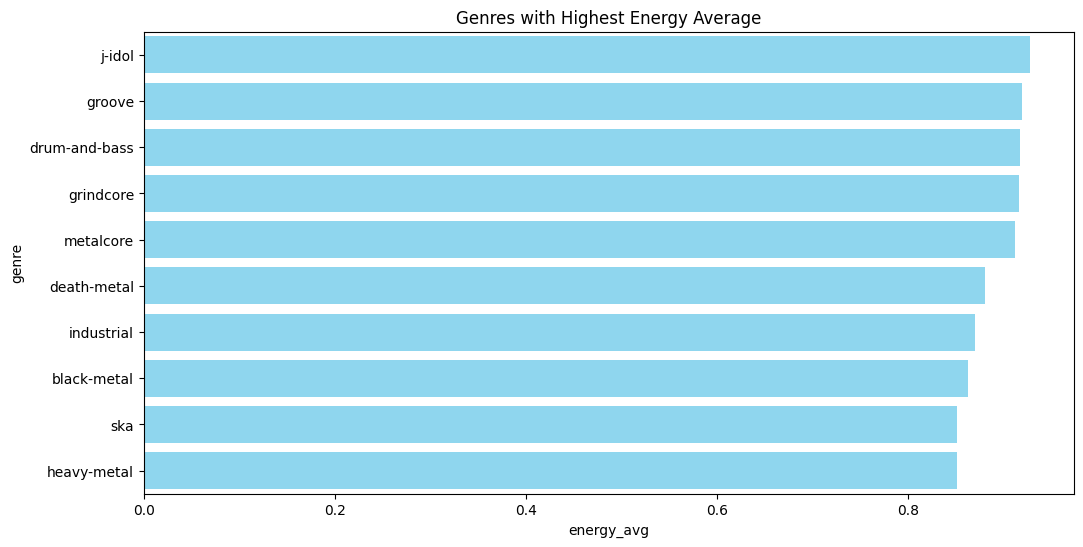

In [93]:
genres_energy_avg = df.explode('track_genre').groupby('track_genre')['energy'].mean().reset_index()
genres_energy_avg.columns = ['genre', 'energy_avg']
filtered_genres = df.explode('track_genre')['track_genre'].value_counts().reset_index()
filtered_genres.columns = ['genre', 'count']
filtered_genres = filtered_genres[filtered_genres['count'] >= MIN_SONGS_COUNT]
genres_energy_avg = pd.merge(genres_energy_avg, filtered_genres, on='genre')
most_energetic_genres = genres_energy_avg.nlargest(TOP_RECORDS_COUNT_FOR_PLOTS, 'energy_avg')
show_barplot(most_energetic_genres, 'energy_avg', 'genre', title='Genres with Highest Energy Average')

### <a id='toc10_25_'></a>[The Loudest Genres](#toc0_)

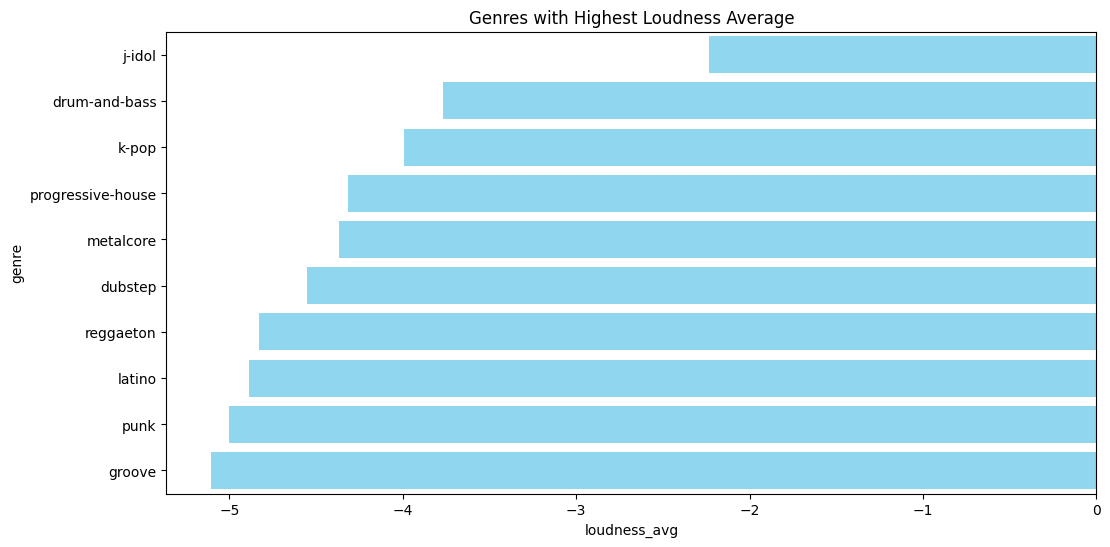

In [94]:
genres_loudness_avg = df.explode('track_genre').groupby('track_genre')['loudness'].mean().reset_index()
genres_loudness_avg.columns = ['genre', 'loudness_avg']
filtered_genres = df.explode('track_genre')['track_genre'].value_counts().reset_index()
filtered_genres.columns = ['genre', 'count']
filtered_genres = filtered_genres[filtered_genres['count'] >= MIN_SONGS_COUNT]
genres_loudness_avg = pd.merge(genres_loudness_avg, filtered_genres, on='genre')
most_loud_genres = genres_loudness_avg.nlargest(TOP_RECORDS_COUNT_FOR_PLOTS, 'loudness_avg')
show_barplot(most_loud_genres, 'loudness_avg', 'genre', title='Genres with Highest Loudness Average')

### <a id='toc10_26_'></a>[The Most Popular Genres](#toc0_)

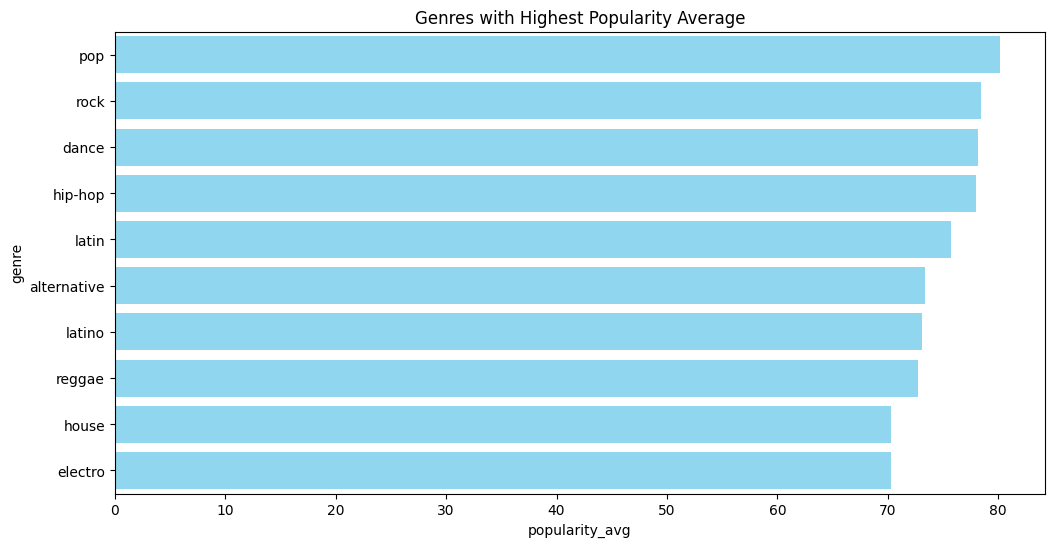

In [95]:
genres_popularity_avg = df.explode('track_genre').groupby('track_genre')['popularity'].mean().reset_index()
genres_popularity_avg.columns = ['genre', 'popularity_avg']
filtered_genres = df.explode('track_genre')['track_genre'].value_counts().reset_index()
filtered_genres.columns = ['genre', 'count']
filtered_genres = filtered_genres[filtered_genres['count'] >= MIN_SONGS_COUNT]
genres_popularity_avg = pd.merge(genres_popularity_avg, filtered_genres, on='genre')
most_popular_genres = genres_popularity_avg.nlargest(TOP_RECORDS_COUNT_FOR_PLOTS, 'popularity_avg')
show_barplot(most_popular_genres, 'popularity_avg', 'genre', title='Genres with Highest Popularity Average')

## <a id='toc11_'></a>[Trends Over Time](#toc0_)

In [96]:
def line_plot(df, x, y_list, figsize=(12, 6), xlabel=None, ylabel=None, title=None, step=None):
	if xlabel is None:
		xlabel = x
	if ylabel is None:
		ylabel = ', '.join(y_list)
	if title is None:
		title = f'{ylabel} by {x} Line Plot'

	plt.figure(figsize=figsize)
	for y in y_list:
		sns.lineplot(data=df, x=x, y=y, label=y)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.title(title)
	if step is not None:
		plt.xticks = plt.xticks()[0][::step]
	plt.show()

### <a id='toc11_1_'></a>[Features Average Over Time](#toc0_)

In [97]:
average_features_by_year = df.groupby('year').mean().reset_index()
average_features_by_decade = df.groupby('decade').mean().reset_index()
average_features_by_year.columns

Index(['year', 'explicit', 'key', 'mode', 'time_signature', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'track_number', 'disc_number', 'decade',
       'quarter', 'month', 'week_of_year', 'day', 'day_of_year',
       'duration_mins', 'duration_ms', 'artist_count', 'genre_count',
       'popularity'],
      dtype='object')

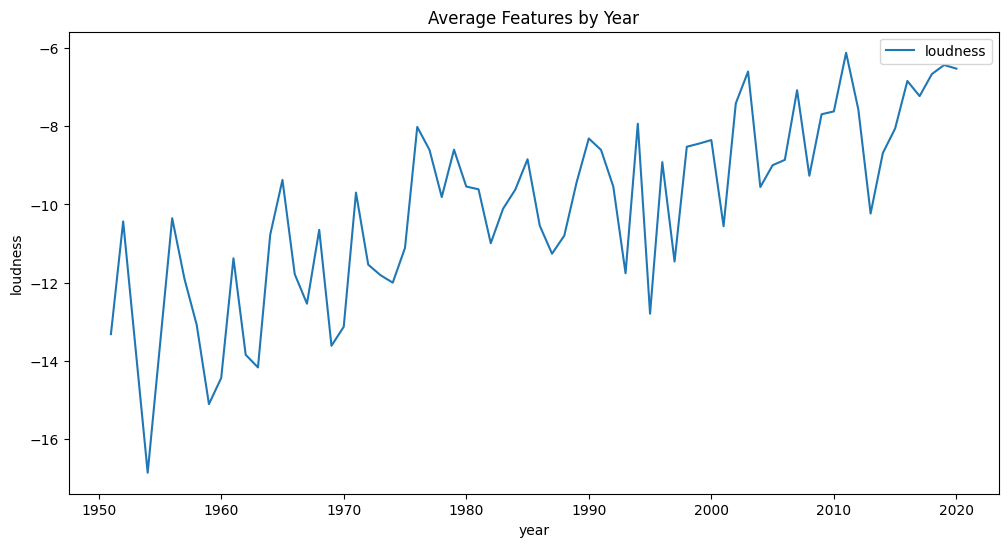

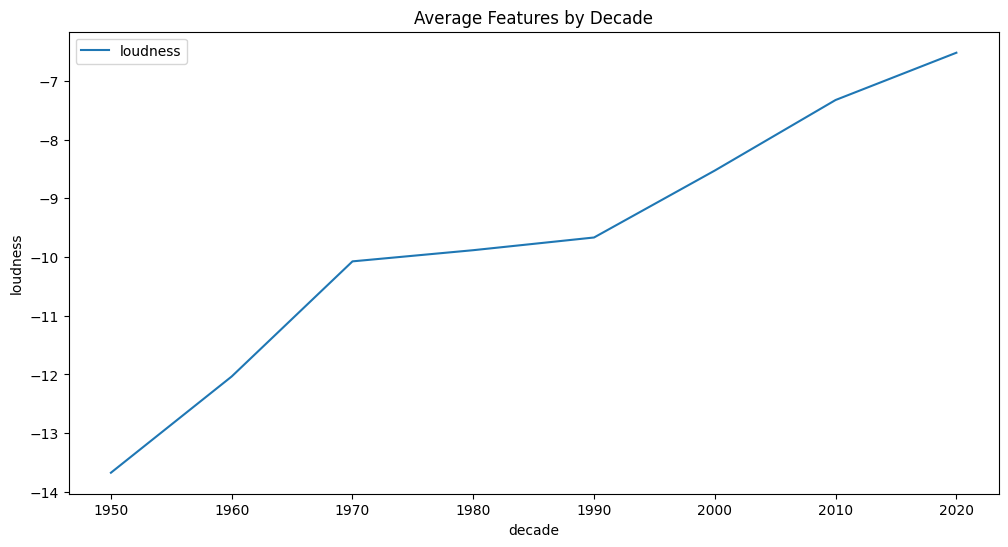

In [98]:
line_plot(average_features_by_year, 'year', ['loudness'], title='Average Features by Year')
line_plot(average_features_by_decade, 'decade', ['loudness'], title='Average Features by Decade')

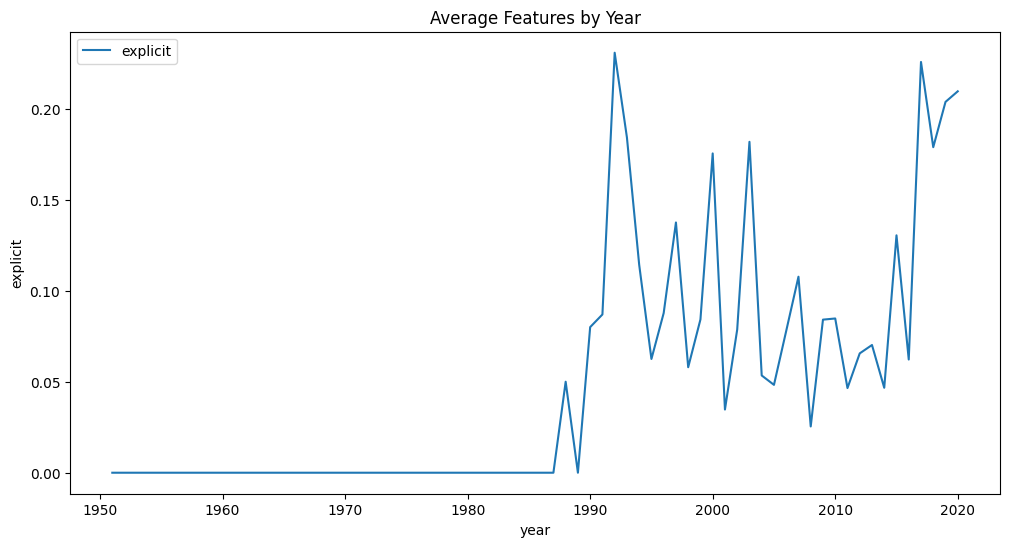

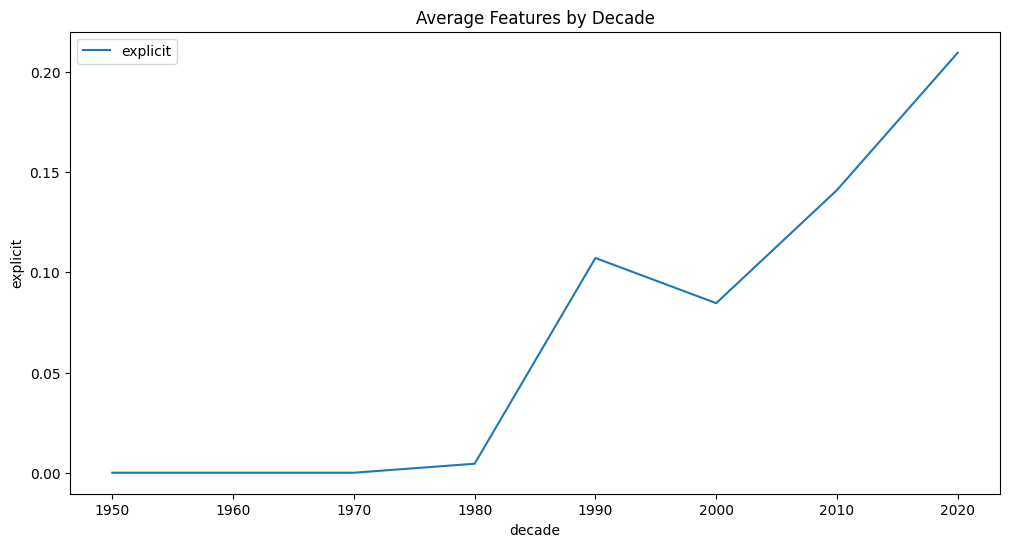

In [99]:
line_plot(average_features_by_year, 'year', ['explicit'], title='Average Features by Year')
line_plot(average_features_by_decade, 'decade', ['explicit'], title='Average Features by Decade')

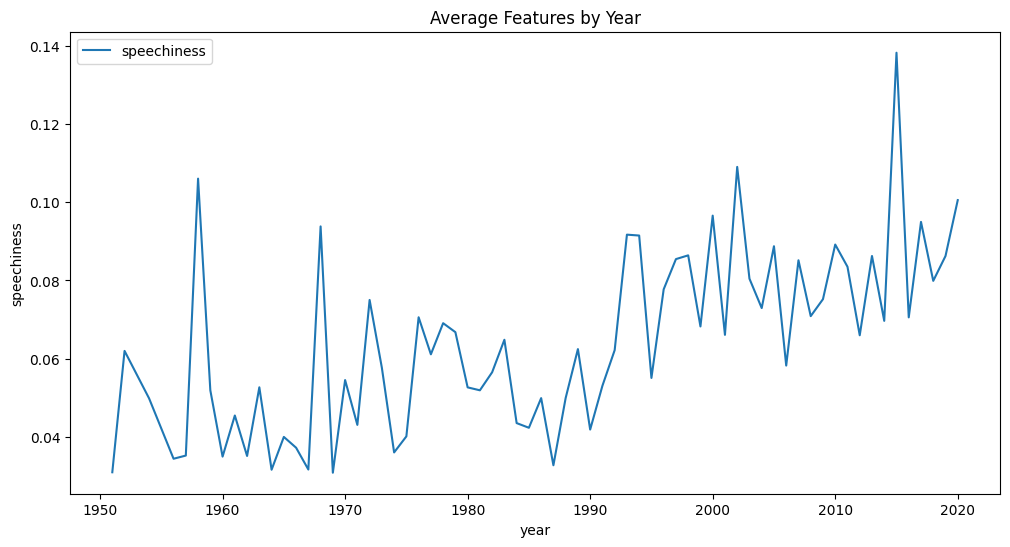

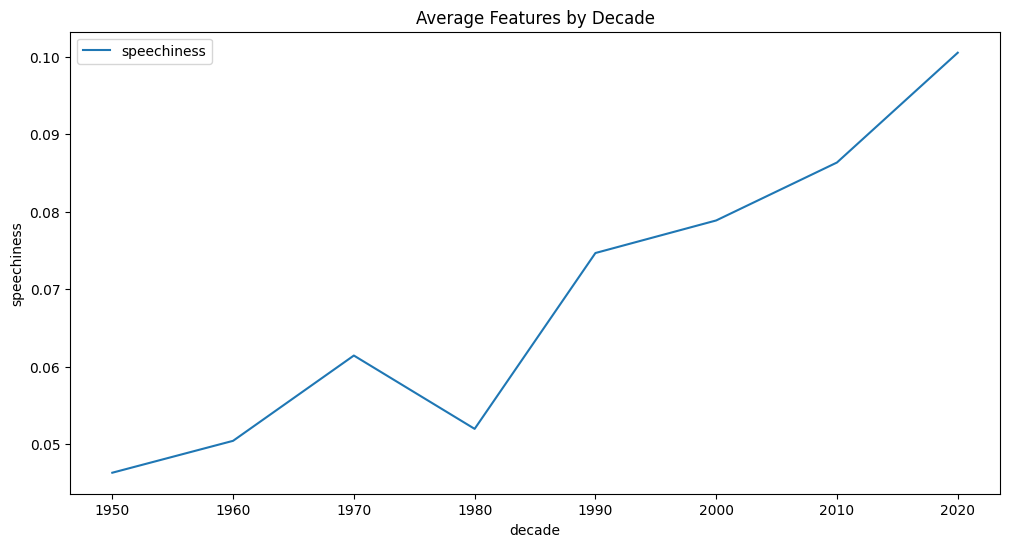

In [100]:
line_plot(average_features_by_year, 'year', ['speechiness'], title='Average Features by Year')
line_plot(average_features_by_decade, 'decade', ['speechiness'], title='Average Features by Decade')

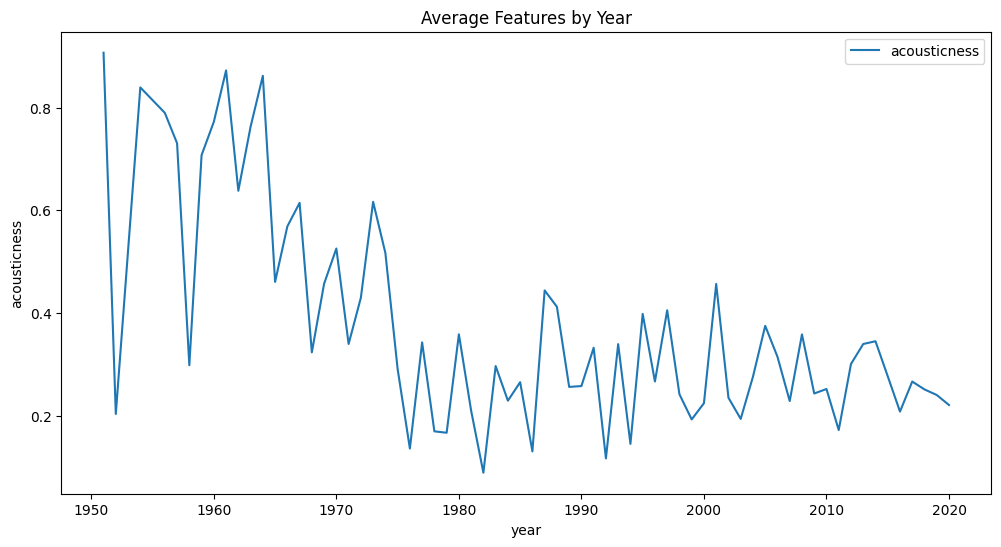

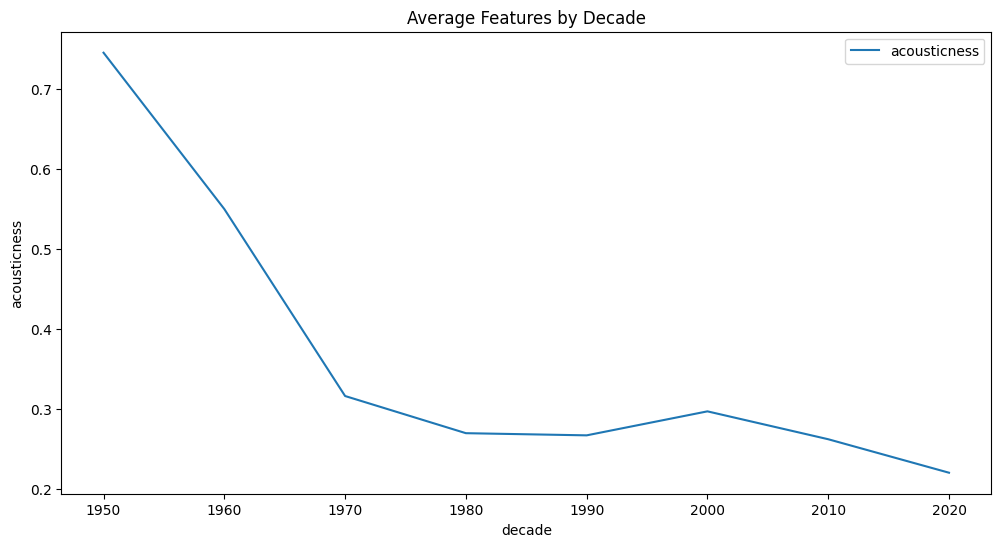

In [101]:
line_plot(average_features_by_year, 'year', ['acousticness'], title='Average Features by Year')
line_plot(average_features_by_decade, 'decade', ['acousticness'], title='Average Features by Decade')

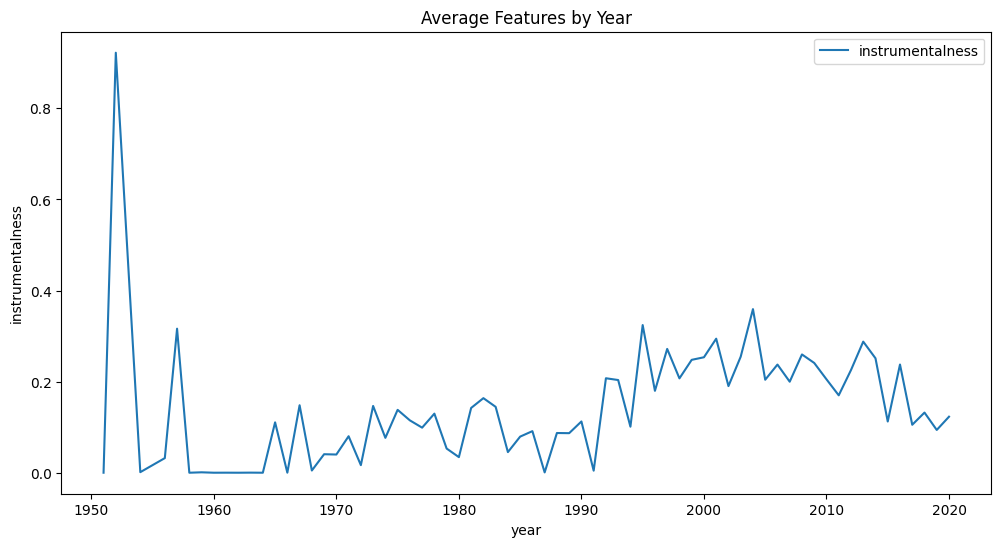

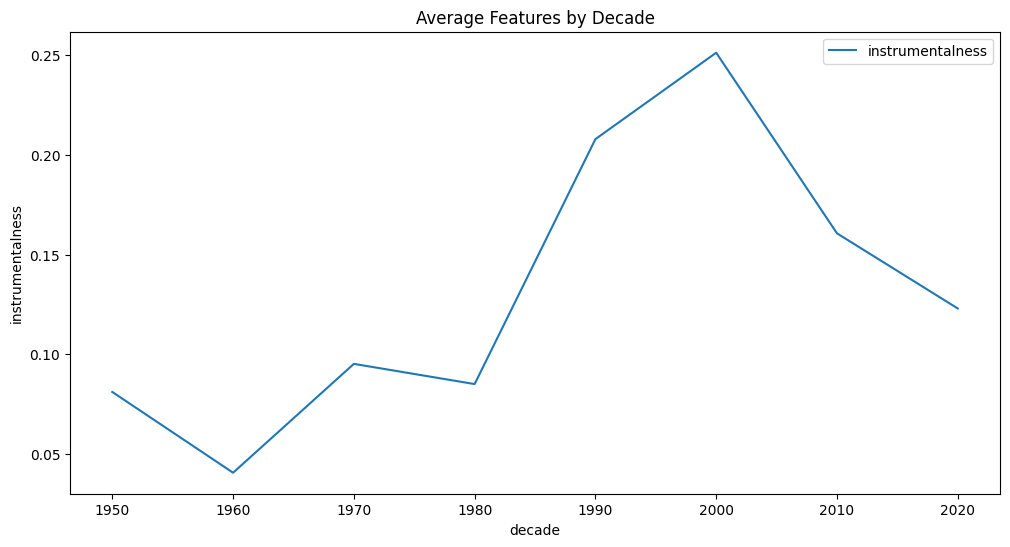

In [102]:
line_plot(average_features_by_year, 'year', ['instrumentalness'], title='Average Features by Year')
line_plot(average_features_by_decade, 'decade', ['instrumentalness'], title='Average Features by Decade')

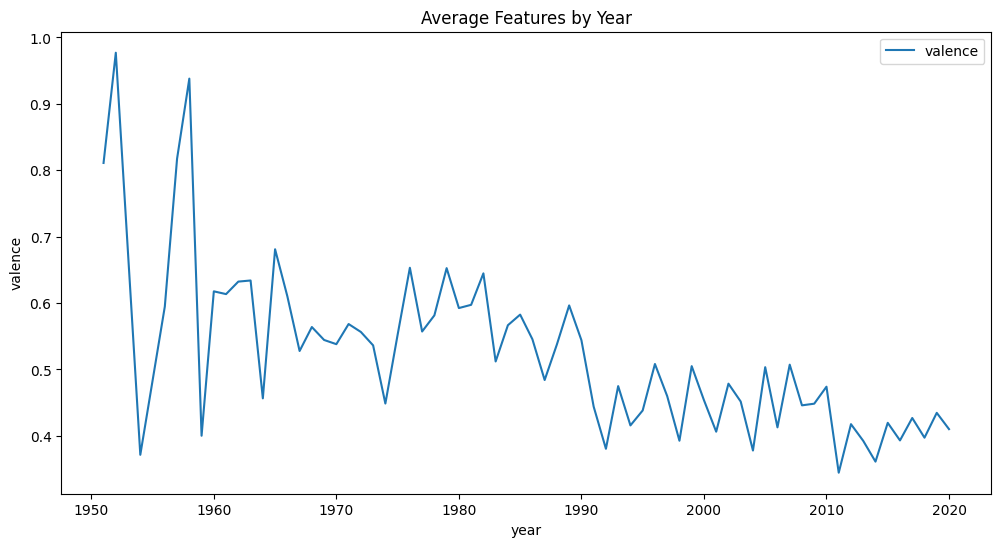

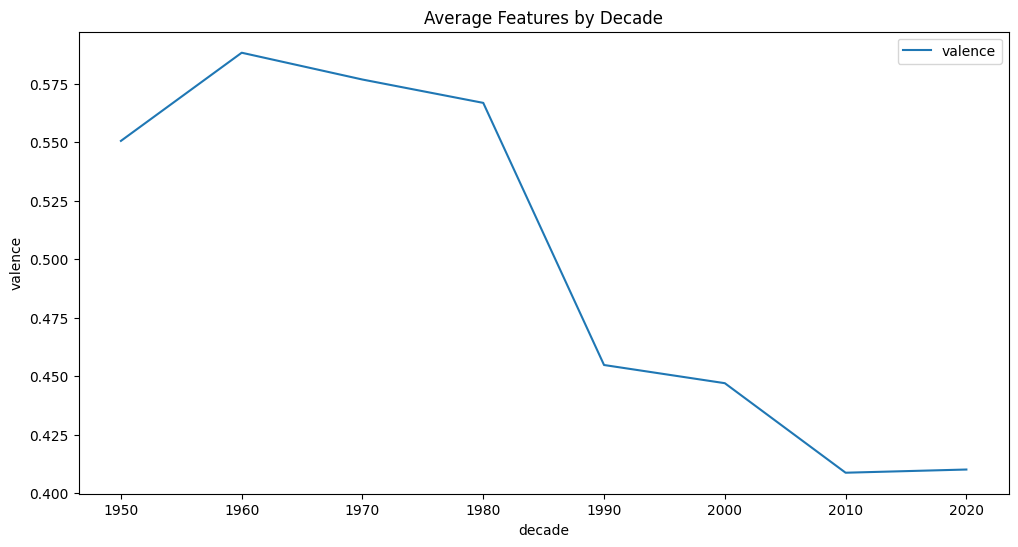

In [103]:
line_plot(average_features_by_year, 'year', ['valence'], title='Average Features by Year')
line_plot(average_features_by_decade, 'decade', ['valence'], title='Average Features by Decade')

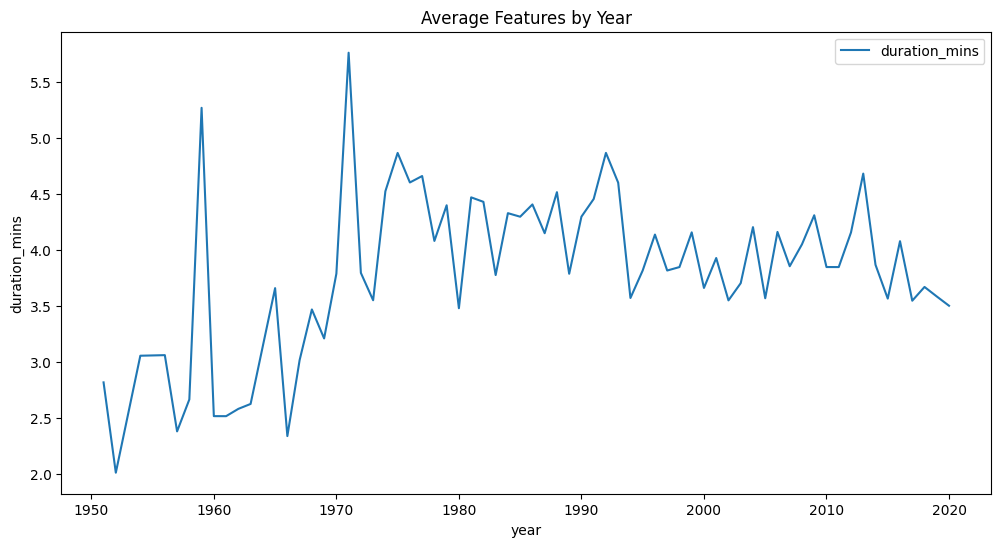

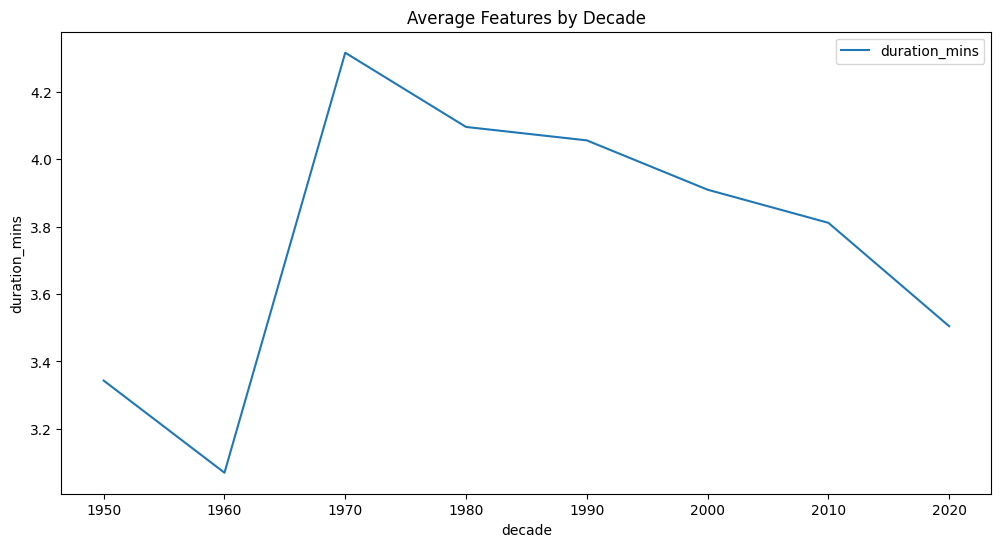

In [104]:
line_plot(average_features_by_year, 'year', ['duration_mins'], title='Average Features by Year')
line_plot(average_features_by_decade, 'decade', ['duration_mins'], title='Average Features by Decade')

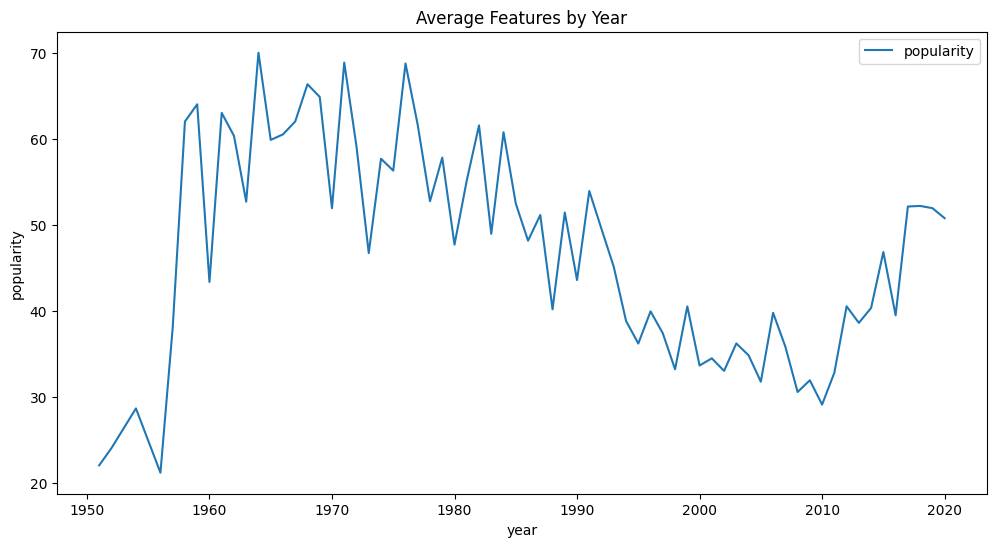

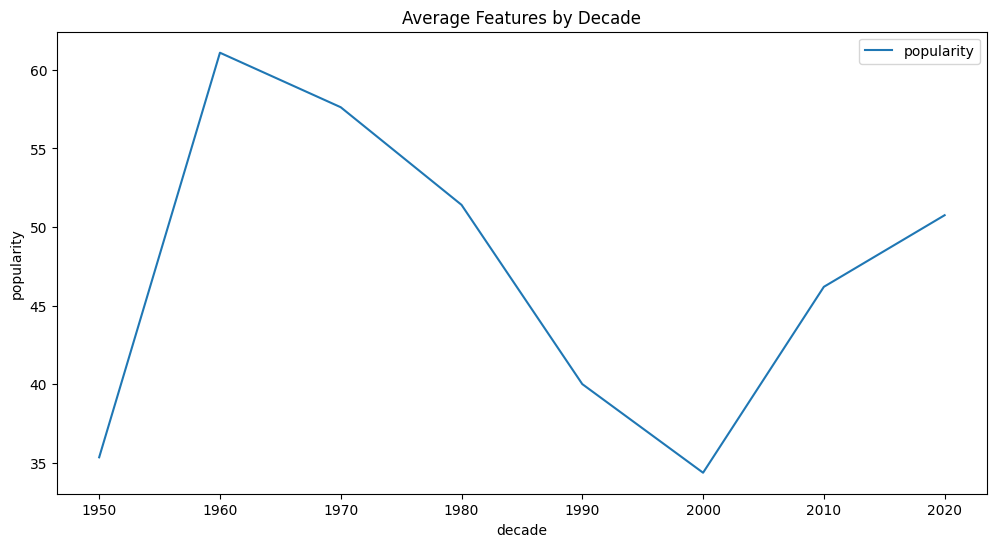

In [105]:
line_plot(average_features_by_year, 'year', ['popularity'], title='Average Features by Year')
line_plot(average_features_by_decade, 'decade', ['popularity'], title='Average Features by Decade')